In [1]:
import gym
import gym_anytrading

from gym_anytrading.envs import TradingEnv, ForexEnv, StocksEnv, Actions, Positions 
from gym_anytrading.datasets import FOREX_EURUSD_1H_ASK, STOCKS_GOOGL
import matplotlib.pyplot as plt
from keras import applications
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten, Dropout, Input, Concatenate, Conv2D
from keras.optimizers import Adam

from rl.agents.dqn import DQNAgent
from rl.agents.ddpg import DDPGAgent
from rl.policy import BoltzmannQPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.core import Processor
from rl.random import OrnsteinUhlenbeckProcess
from rl.callbacks import FileLogger, ModelIntervalCheckpoint, TrainIntervalLogger
from rl.processors import WhiteningNormalizerProcessor

from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

import json
import numpy as np

Using TensorFlow backend.
/Users/williamtan/tech/iss/mtech-sls/env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/williamtan/tech/iss/mtech-sls/env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/williamtan/tech/iss/mtech-sls/env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/U

In [2]:
def env_creator():
    return gym.make('forex-v0', frame_bound=(50, 5000), window_size=10)

env = env_creator()
nb_actions = env.action_space.n

def buildModel():
    # Next, we build a very simple model.
    model = Sequential()

    #model.add(Conv2D(input_shape=(1,10,2), filters=32, kernel_size=(4,2), padding='same'))
    #model.add(Conv2D(filters=64, kernel_size=(4,2), padding='same'))
    #model.add(Conv2D(filters=128, kernel_size=(4,2), padding='same'))
    #model.add(Conv2D(filters=128, kernel_size=(4,2), padding='same'))
    #model.add(Flatten())
    model.add(Flatten(input_shape=(1,10,2)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(nb_actions, activation='linear'))
    return model
buildModel().summary()
def agent_creator():
    #processor = EnvProcessor()
    processor = WhiteningNormalizerProcessor()
    memory = SequentialMemory(limit=2048, window_length=1)
    policy = EpsGreedyQPolicy()
    gamma = 0
    #policy = BoltzmannQPolicy()
    agent = DQNAgent(model=buildModel(), nb_actions=nb_actions, memory=memory, nb_steps_warmup=64, policy=policy, batch_size=32, processor=processor, 
                   gamma=gamma, target_model_update=1e-2, train_interval=8, enable_double_dqn=False)
    agent.compile(Adam(lr=0.01), metrics=['mae'])
    return agent

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                672       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 66        
Total params: 2,850
Trainable params: 2,850
Non-trainable params: 0
_________________________________________________________________


starting train 1
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
  1/989 [..............................] - ETA: 1:15 - reward: 0.0000e+00 - cumulative_reward: 0.0000e+00WARNING:tensorflow:From /Users/williamtan/tech/iss/mtech-sls/env/lib/python3.7/site-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.
989/989 [==============================] - 6s 6ms/step - reward: -0.2781 - cumulative_reward: -434.3030
train 1 completed. took 6.618 seconds, total_reward: -275.2999999999953 total_profit: 0.8355089152916855
min reward: -120.90000000000157, max reward: 170.40000000000165, mean_reward: -0.05562739947464039


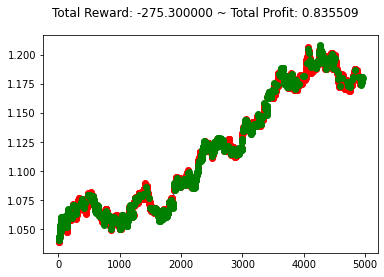

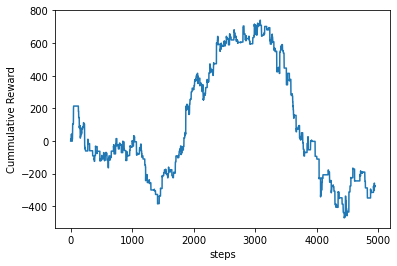

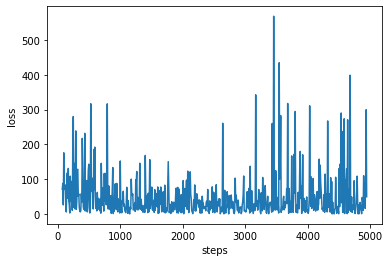

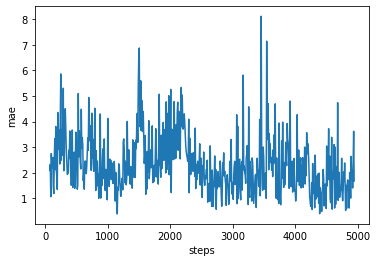

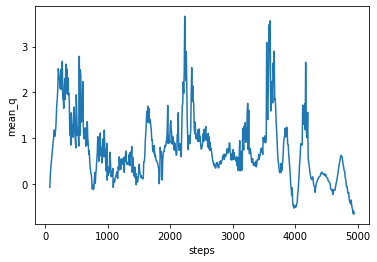

starting train 2
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 7s 7ms/step - reward: 11.1545 - cumulative_reward: -1079.1192
train 2 completed. took 14.907 seconds, total_reward: -935.8999999999498 total_profit: 0.8156325760413842
min reward: -165.89999999999884, max reward: 204.40000000000015, mean_reward: -0.18910891089107898


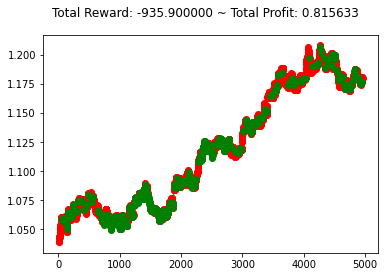

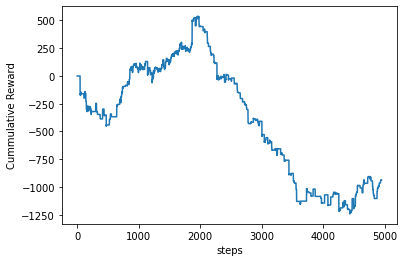

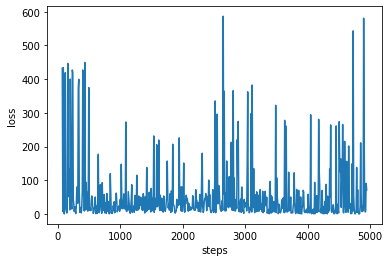

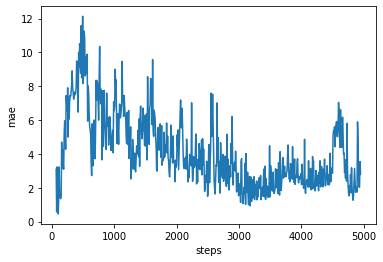

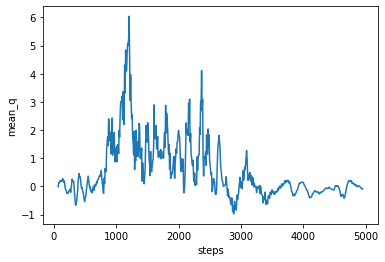

starting train 3
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 7s 7ms/step - reward: -1.2663 - cumulative_reward: -1073.1178
train 3 completed. took 23.778 seconds, total_reward: -1253.3999999999642 total_profit: 0.8318472130493472
min reward: -165.29999999999933, max reward: 114.50000000000182, mean_reward: -0.25326328551221744


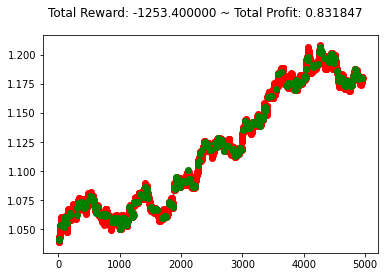

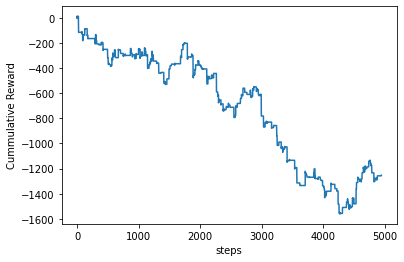

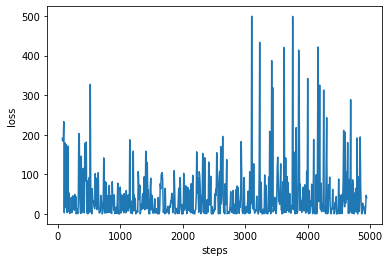

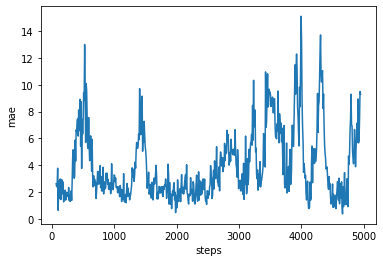

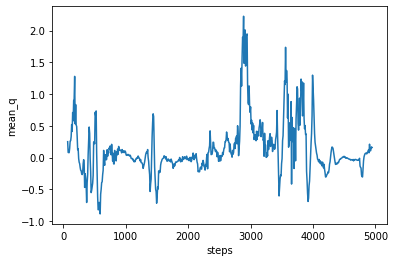

starting train 4
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 8s 8ms/step - reward: -0.1475 - cumulative_reward: -337.1759
train 4 completed. took 33.395 seconds, total_reward: -146.00000000006366 total_profit: 0.8600692941426094
min reward: -115.30000000000041, max reward: 189.20000000000047, mean_reward: -0.029500909274613792


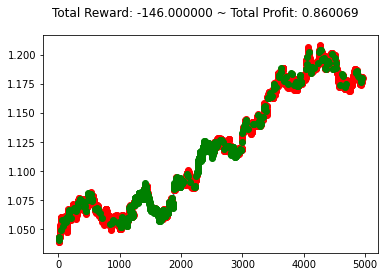

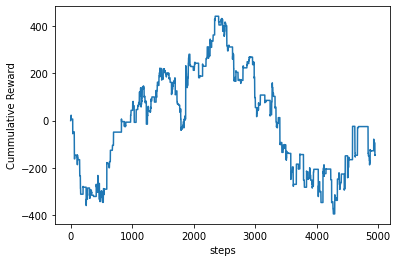

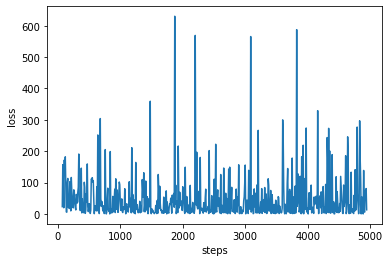

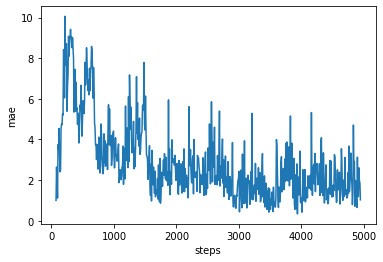

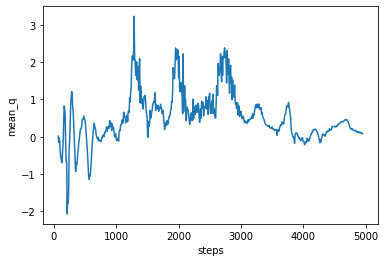

starting train 5
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 8s 8ms/step - reward: -14.1649 - cumulative_reward: -781.1451
train 5 completed. took 43.728 seconds, total_reward: -955.0999999999691 total_profit: 0.8252707438223343
min reward: -187.6000000000011, max reward: 132.4000000000014, mean_reward: -0.19298848252171533


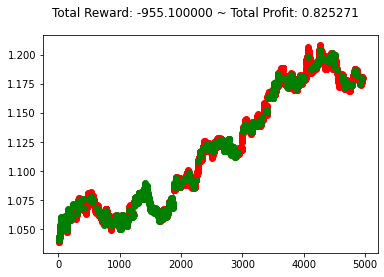

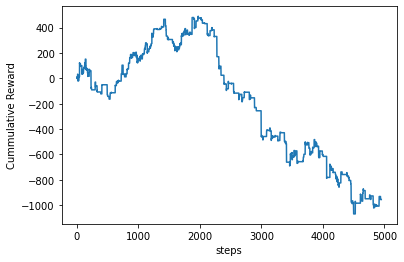

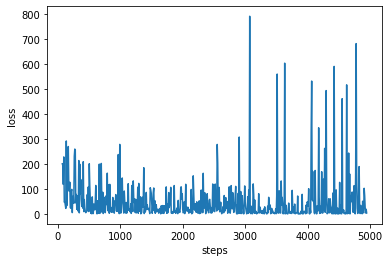

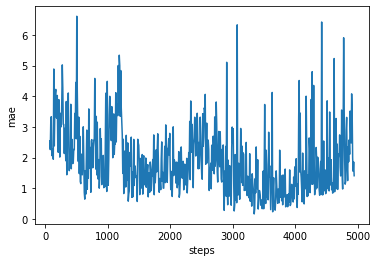

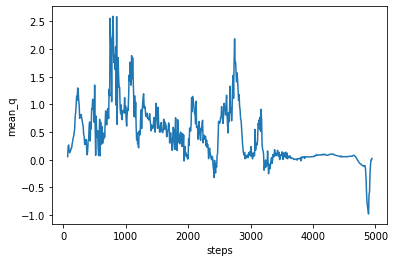

starting train 6
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 9s 9ms/step - reward: -0.1055 - cumulative_reward: -253.4978
train 6 completed. took 54.772 seconds, total_reward: -104.4000000000092 total_profit: 0.8519149455127287
min reward: -182.1000000000006, max reward: 220.6000000000019, mean_reward: -0.021095170741565812


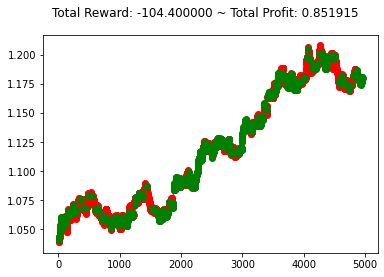

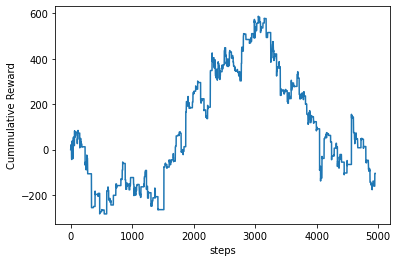

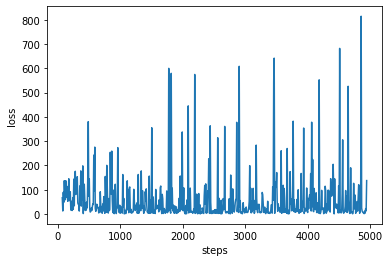

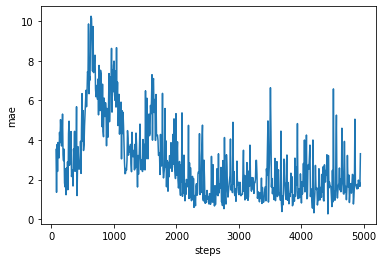

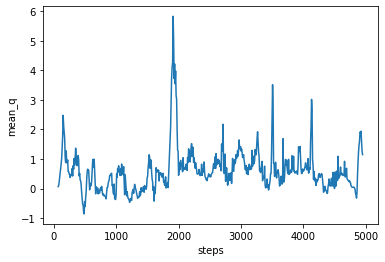

starting train 7
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 9s 9ms/step - reward: -15.9417 - cumulative_reward: 115.2671
train 7 completed. took 66.353 seconds, total_reward: -41.299999999930634 total_profit: 0.8720611733477737
min reward: -171.5, max reward: 181.20000000000135, mean_reward: -0.00834512022629433


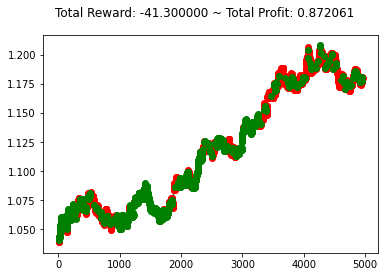

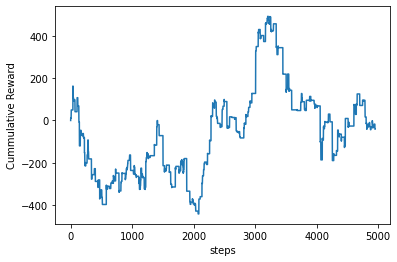

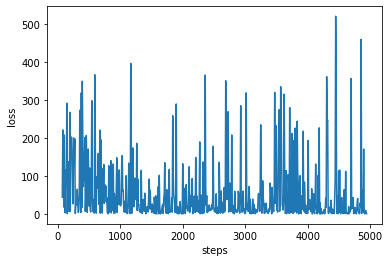

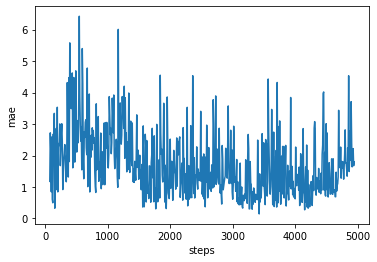

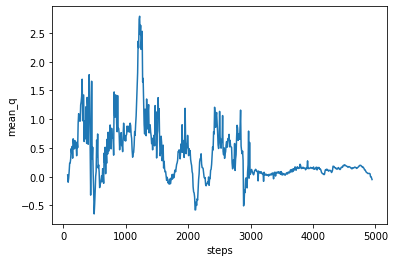

starting train 8
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 10s 10ms/step - reward: -10.9852 - cumulative_reward: -215.4709
train 8 completed. took 78.815 seconds, total_reward: -183.30000000005728 total_profit: 0.8428965726294183
min reward: -227.80000000000024, max reward: 151.39999999999932, mean_reward: -0.037037785411205754


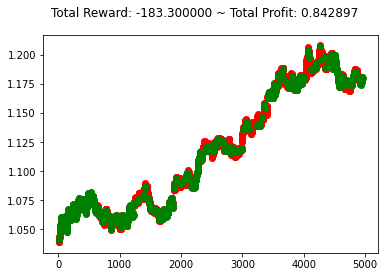

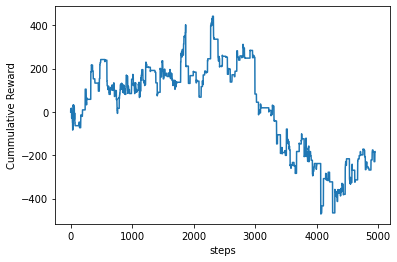

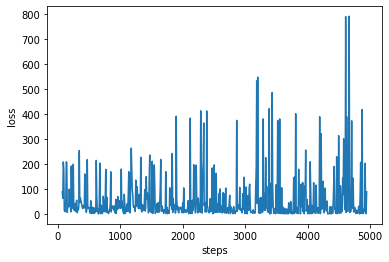

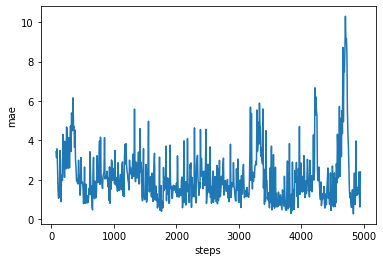

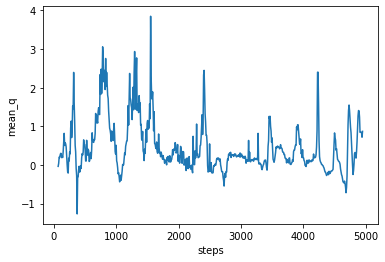

starting train 9
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 11s 11ms/step - reward: -0.6388 - cumulative_reward: -659.5011
train 9 completed. took 91.955 seconds, total_reward: -632.2999999999861 total_profit: 0.836050237988157
min reward: -155.40000000000109, max reward: 168.70000000000164, mean_reward: -0.12776318448171067


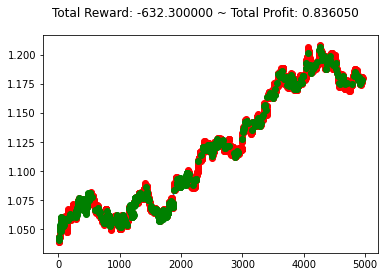

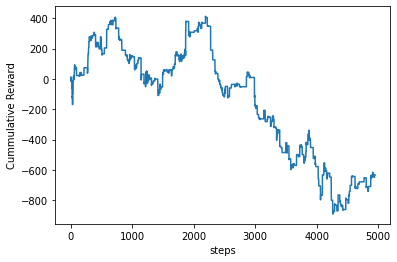

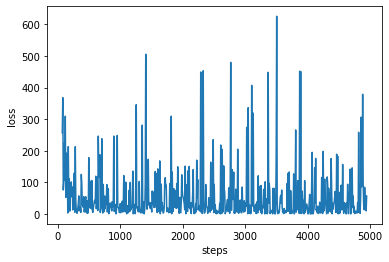

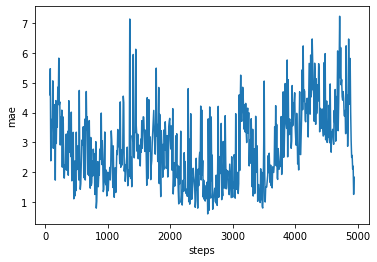

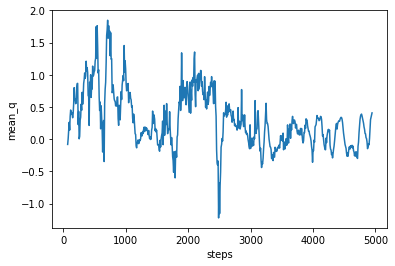

starting train 10
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 11s 11ms/step - reward: 0.5114 - cumulative_reward: 197.2427
train 10 completed. took 105.738 seconds, total_reward: 506.2000000000571 total_profit: 0.8550324332113585
min reward: -175.6000000000002, max reward: 199.79999999999887, mean_reward: 0.10228328955345668


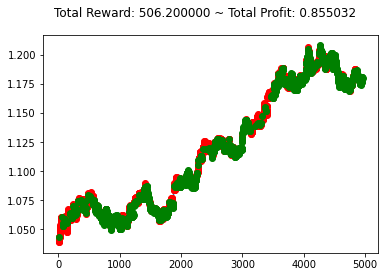

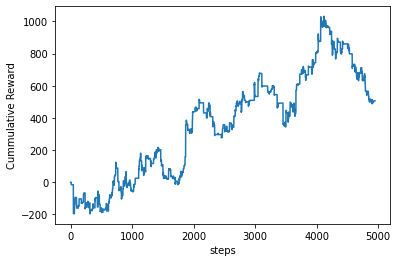

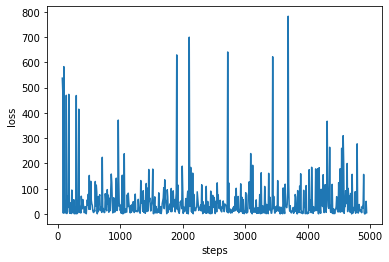

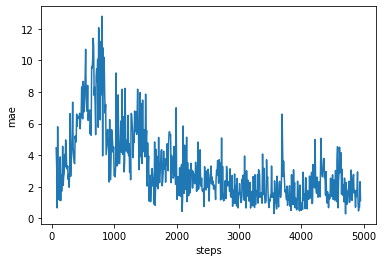

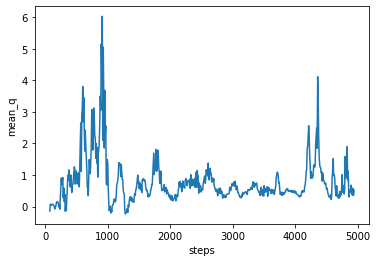

In [3]:
from evaluator import Evaluator

e = Evaluator(agent_creator, env_creator, name="dqn-gamma0")
e.train(repeat=10)


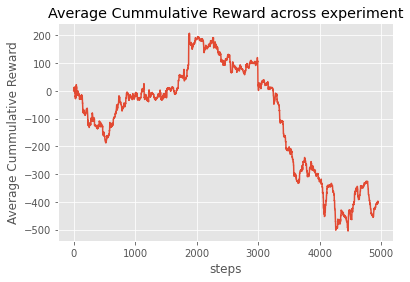

Testing for 1 episodes ...
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
137/199 [===================>..........] - ETA: 0s - reward: -1.7540 - cumulative_reward: -97.8370   Episode 1: reward: -405.100, steps: 999
test completed. total_reward: -405.0999999999961 total_profit: 0.9620600499196851
min reward: -178.59999999999988, max reward: 88.50000000000024, mean_reward: -0.40550550550550163


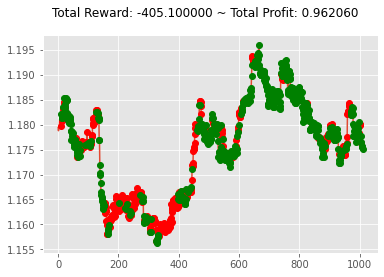

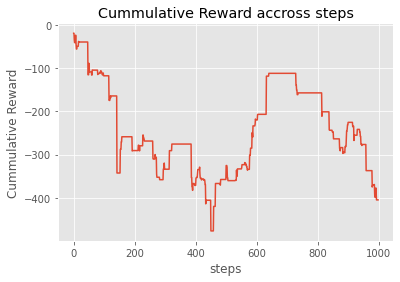

In [4]:
e.process_train_result()
e.test(gym.make('forex-v0', frame_bound=(5000, 6000), window_size=10))

starting train 1
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 9s 9ms/step - reward: -0.8827 - cumulative_reward: -589.4469
train 1 completed. took 10.811 seconds, total_reward: -873.6999999999908 total_profit: 0.8413956011515283
min reward: -167.39999999999978, max reward: 136.00000000000057, mean_reward: -0.17654071529601756


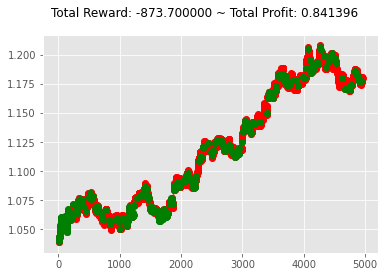

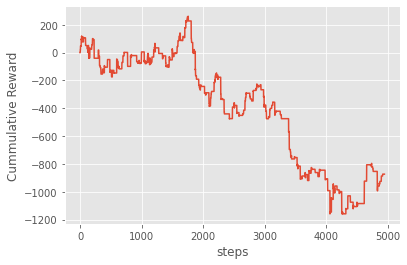

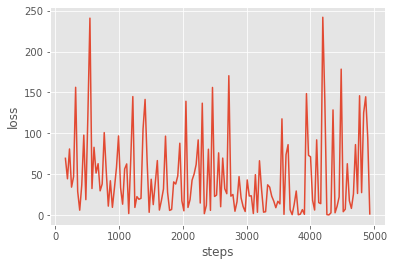

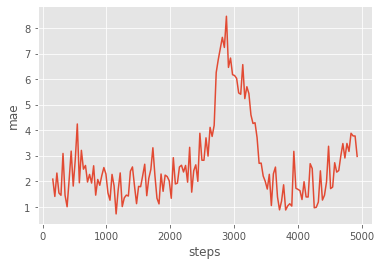

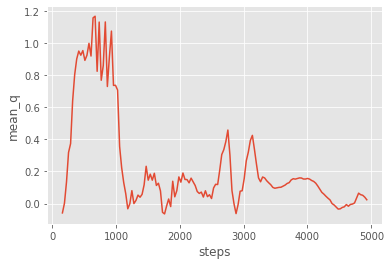

starting train 2
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 10s 10ms/step - reward: 12.8695 - cumulative_reward: 57.2996
train 2 completed. took 23.670 seconds, total_reward: 761.6999999999894 total_profit: 0.9044527664243897
min reward: -167.80000000000018, max reward: 180.40000000000055, mean_reward: 0.15390988078399462


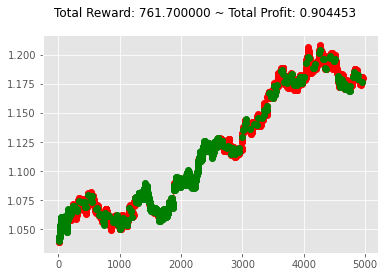

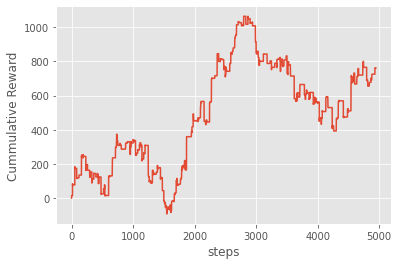

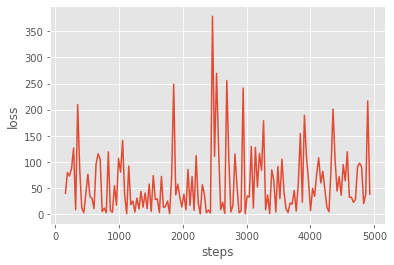

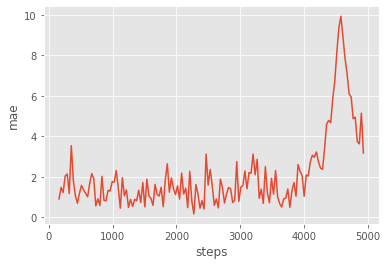

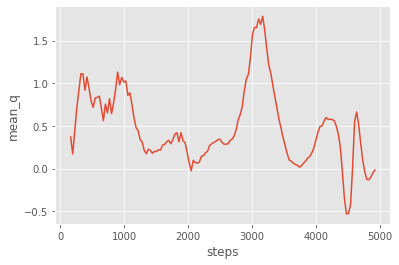

starting train 3
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 10s 10ms/step - reward: -0.8809 - cumulative_reward: -876.7786
train 3 completed. took 37.262 seconds, total_reward: -871.8999999999658 total_profit: 0.844336540604119
min reward: -158.50000000000142, max reward: 123.80000000000058, mean_reward: -0.1761770054556407


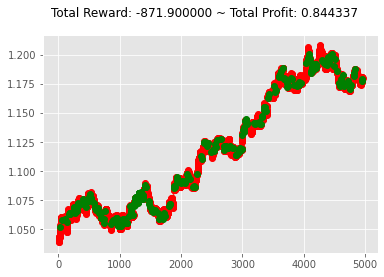

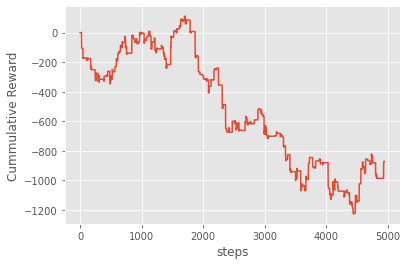

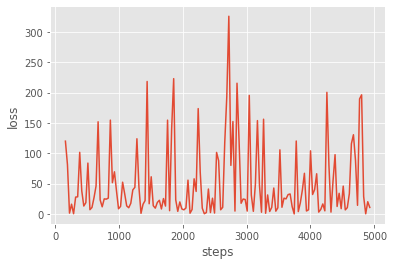

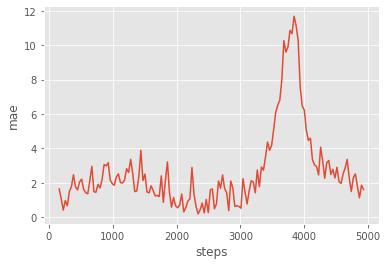

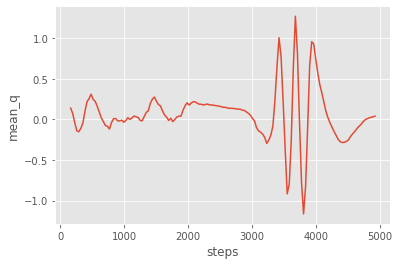

starting train 4
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 11s 11ms/step - reward: 1.0366 - cumulative_reward: 109.4519
train 4 completed. took 51.340 seconds, total_reward: 1025.9999999999518 total_profit: 0.9046874081499611
min reward: -237.40000000000094, max reward: 185.5999999999991, mean_reward: 0.20731460901191187


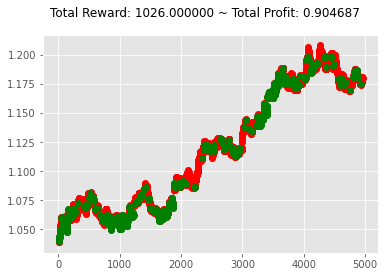

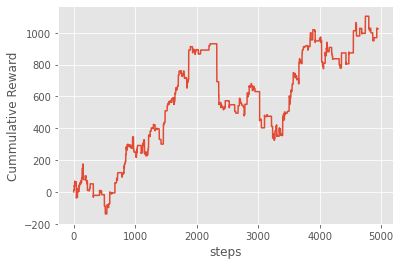

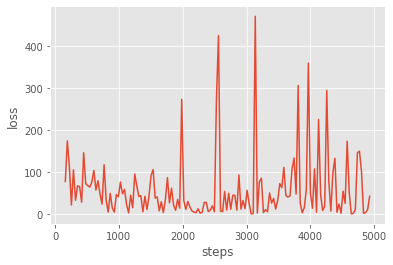

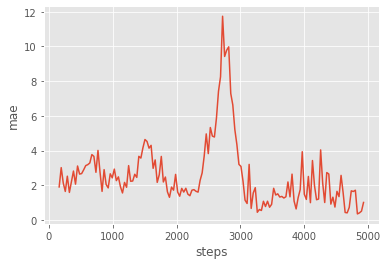

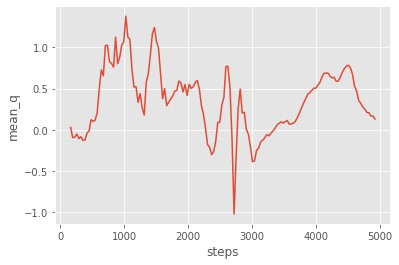

starting train 5
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 11s 11ms/step - reward: -1.1327 - cumulative_reward: -735.2307
train 5 completed. took 66.197 seconds, total_reward: -1121.0999999999794 total_profit: 0.8324425285133887
min reward: -217.7999999999991, max reward: 106.29999999999917, mean_reward: -0.22653061224489382


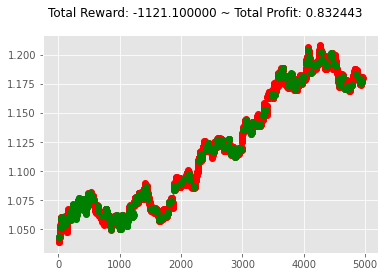

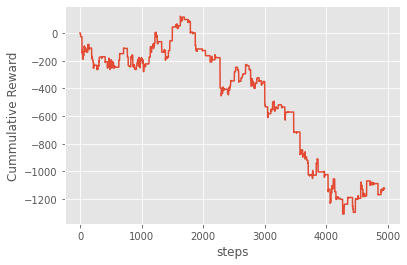

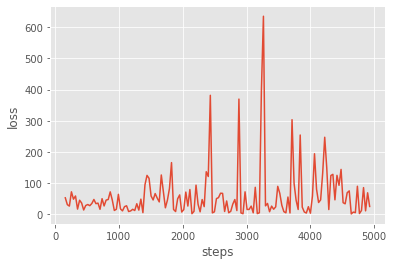

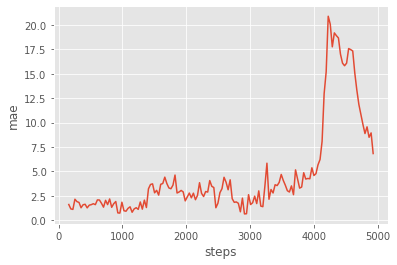

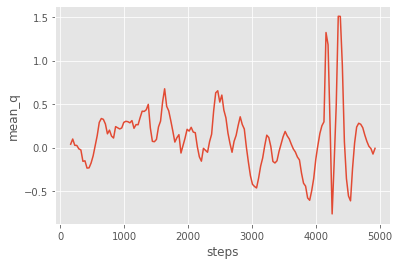

starting train 6
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 12s 12ms/step - reward: 0.2674 - cumulative_reward: 16.0335
train 6 completed. took 82.070 seconds, total_reward: 264.70000000005956 total_profit: 0.8954352016562058
min reward: -165.79999999999816, max reward: 183.10000000000048, mean_reward: 0.05348555263690838


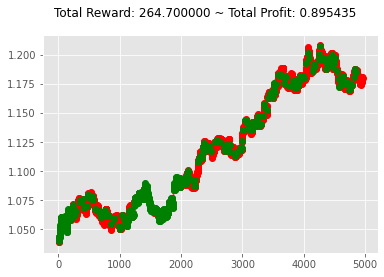

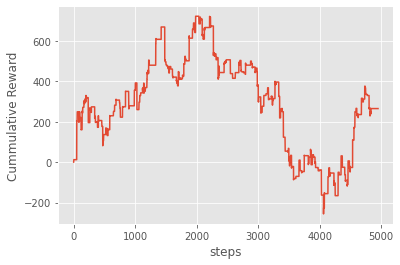

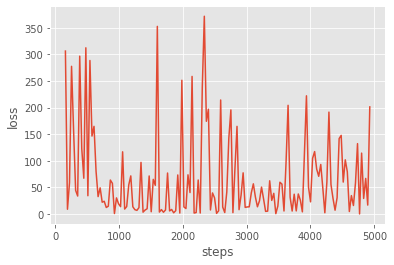

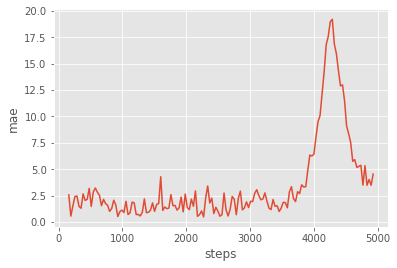

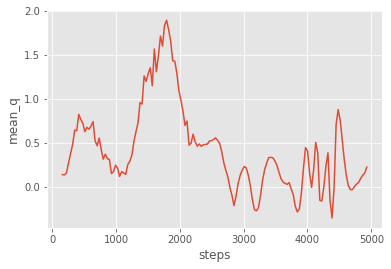

starting train 7
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 12s 12ms/step - reward: 10.6030 - cumulative_reward: -1119.2859
train 7 completed. took 98.339 seconds, total_reward: -1481.699999999949 total_profit: 0.8305087022841008
min reward: -196.39999999999878, max reward: 152.70000000000118, mean_reward: -0.29939381693270334


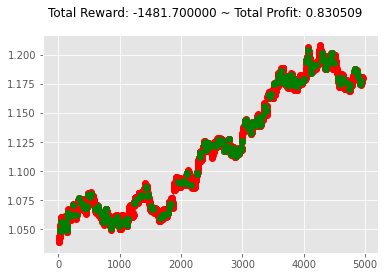

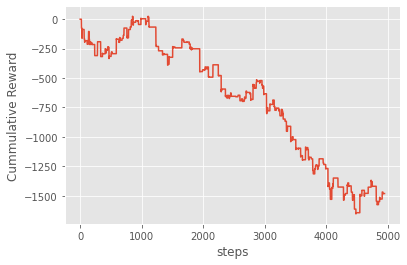

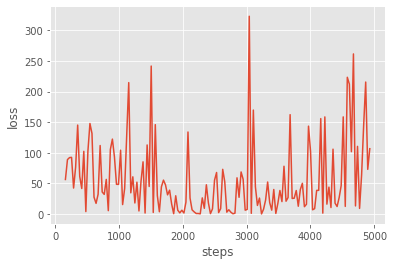

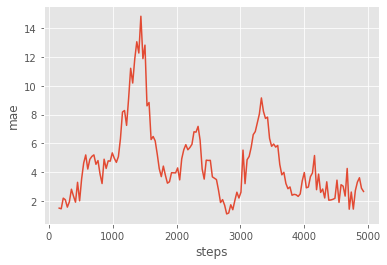

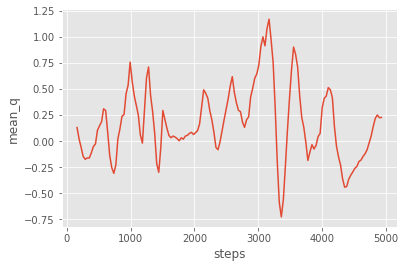

starting train 8
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 13s 13ms/step - reward: 0.6552 - cumulative_reward: -128.1416
train 8 completed. took 115.376 seconds, total_reward: 648.5000000000075 total_profit: 0.8973466489770756
min reward: -174.40000000000123, max reward: 180.8999999999994, mean_reward: 0.1310365730450611


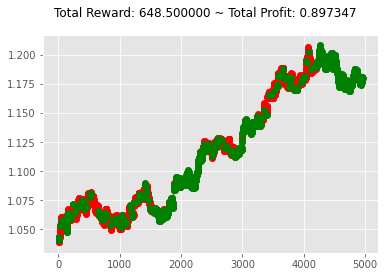

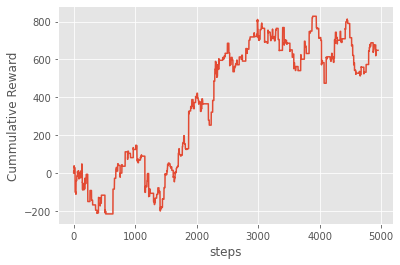

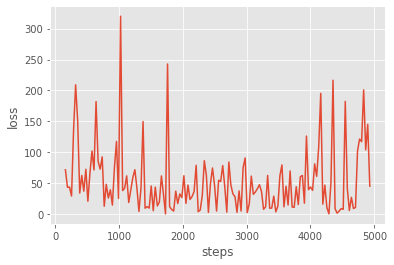

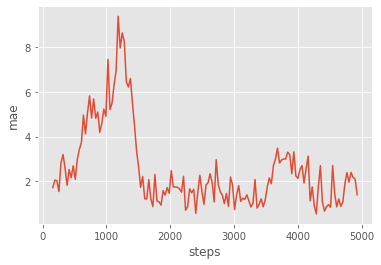

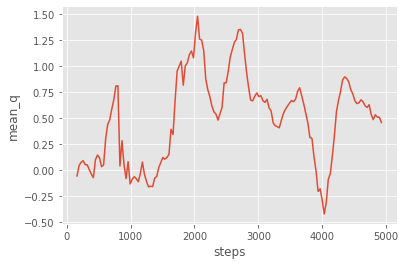

starting train 9
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 14s 14ms/step - reward: 0.8290 - cumulative_reward: 212.9429
train 9 completed. took 133.448 seconds, total_reward: 820.500000000031 total_profit: 0.9122970929917602
min reward: -176.89999999999984, max reward: 177.30000000000024, mean_reward: 0.16579106890281492


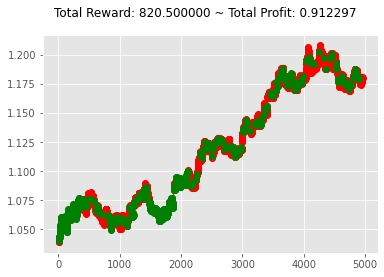

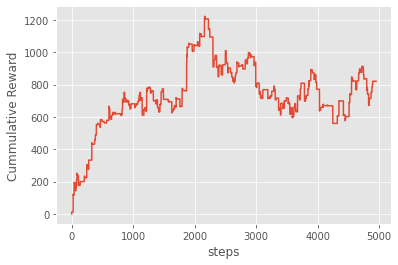

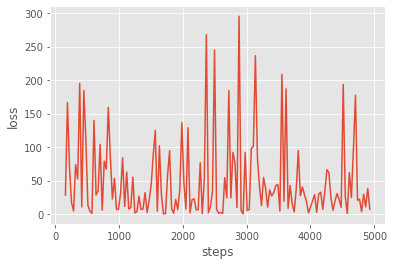

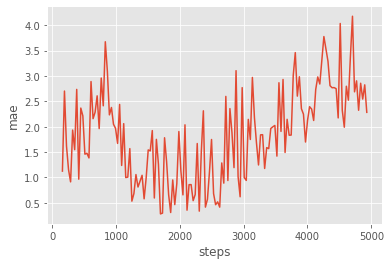

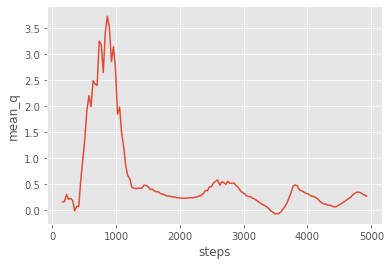

starting train 10
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 14s 14ms/step - reward: -10.4545 - cumulative_reward: -238.6739
train 10 completed. took 152.064 seconds, total_reward: 143.99999999997058 total_profit: 0.8665233965813998
min reward: -185.29999999999936, max reward: 197.1999999999996, mean_reward: 0.02909678722973744


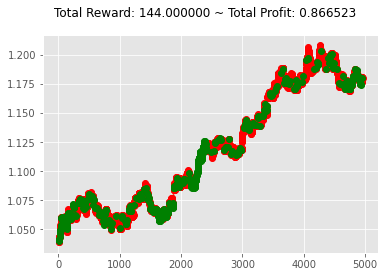

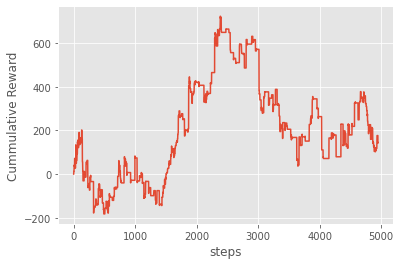

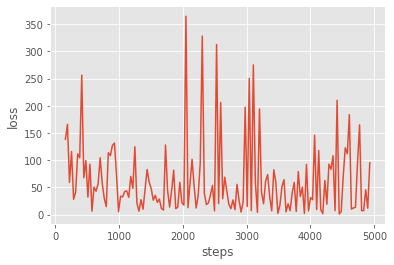

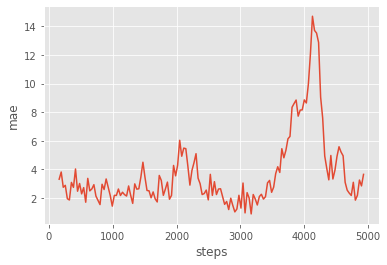

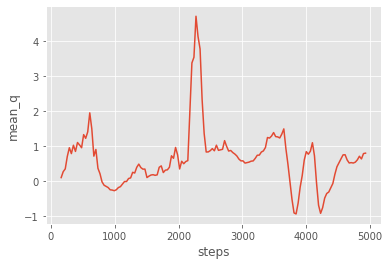

In [5]:
def agent_creator():
    #processor = EnvProcessor()
    processor = WhiteningNormalizerProcessor()
    memory = SequentialMemory(limit=1024, window_length=1)
    policy = EpsGreedyQPolicy()
    gamma = 0.3
    #policy = BoltzmannQPolicy()
    agent = DQNAgent(model=buildModel(), nb_actions=nb_actions, memory=memory, nb_steps_warmup=128, policy=policy, batch_size=64, processor=processor, 
                   gamma=gamma, target_model_update=1e-2, train_interval=32, enable_double_dqn=False)
    agent.compile(Adam(lr=0.01), metrics=['mae'])
    return agent
e = Evaluator(agent_creator, env_creator, name="dqn-gamma30")
e.train(repeat=10)

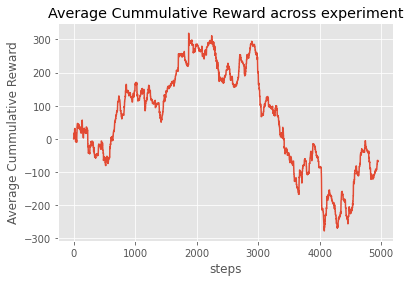

Testing for 1 episodes ...
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
192/199 [===========================>..] - ETA: 0s - reward: -1.9009 - cumulative_reward: -301.8812Episode 1: reward: -348.500, steps: 999
test completed. total_reward: -348.4999999999937 total_profit: 0.9709540070602628
min reward: -173.5999999999982, max reward: 67.69999999999942, mean_reward: -0.34884884884884254


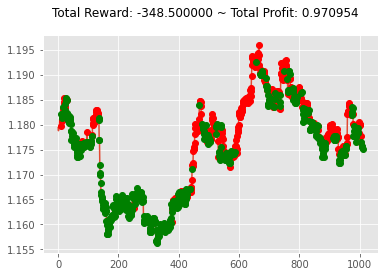

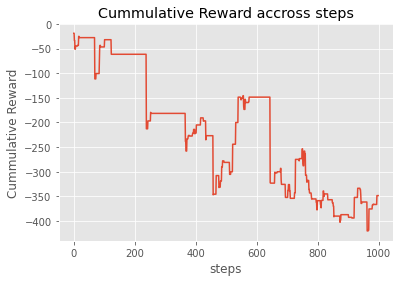

In [6]:
e.process_train_result()
e.test(gym.make('forex-v0', frame_bound=(5000, 6000), window_size=10))

starting train 1
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 15s 15ms/step - reward: 44.3949 - cumulative_reward: -647.0222
train 1 completed. took 17.696 seconds, total_reward: -697.9000000000082 total_profit: 0.8280989859922996
min reward: -195.80000000000152, max reward: 138.89999999999958, mean_reward: -0.14101838755304266


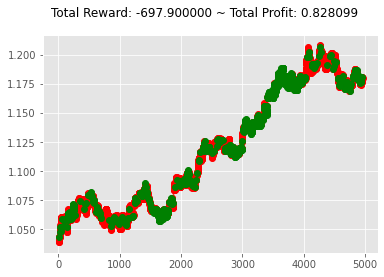

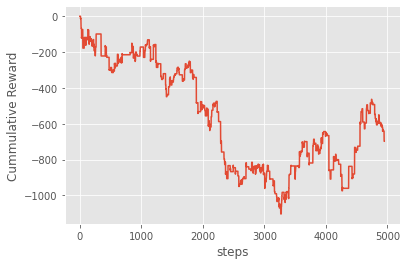

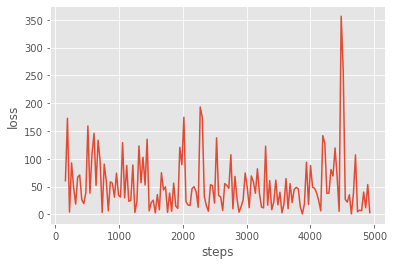

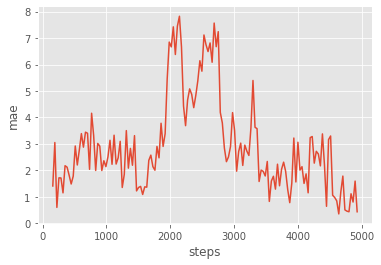

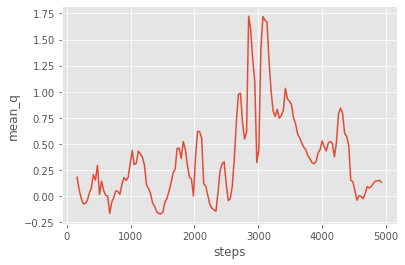

starting train 2
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 16s 16ms/step - reward: -1.4177 - cumulative_reward: -1136.5620
train 2 completed. took 38.756 seconds, total_reward: -1403.1999999999846 total_profit: 0.8229041077259238
min reward: -179.60000000000198, max reward: 201.80000000000086, mean_reward: -0.28353202667205185


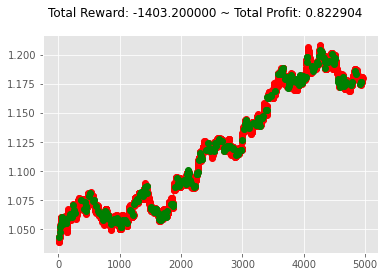

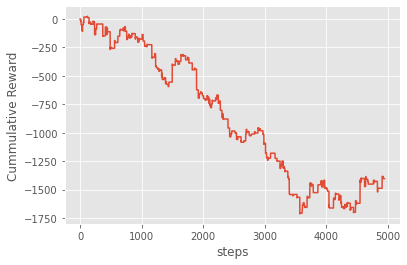

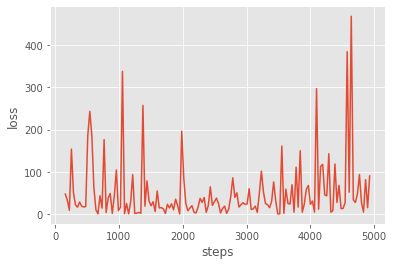

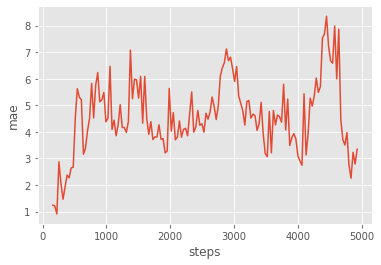

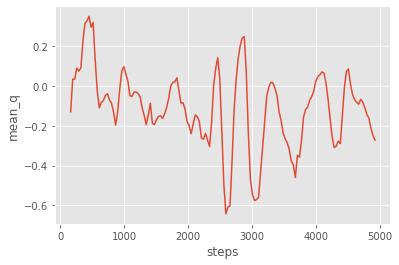

starting train 3
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 16s 17ms/step - reward: 2.8267 - cumulative_reward: -1047.8236
train 3 completed. took 60.226 seconds, total_reward: -1260.2999999999845 total_profit: 0.8307207133178964
min reward: -181.79999999999862, max reward: 175.70000000000084, mean_reward: -0.2546575065669801


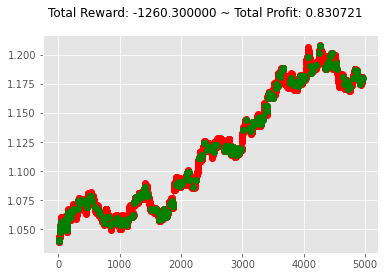

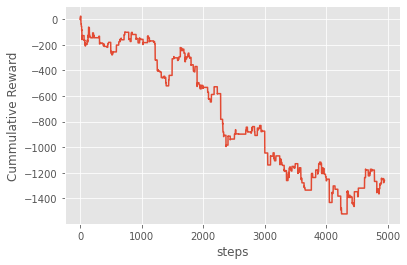

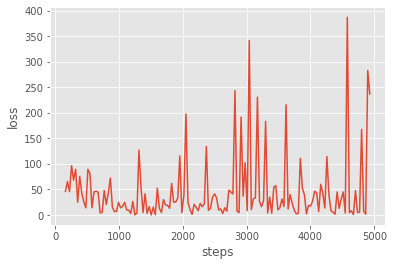

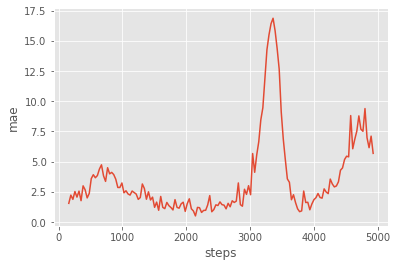

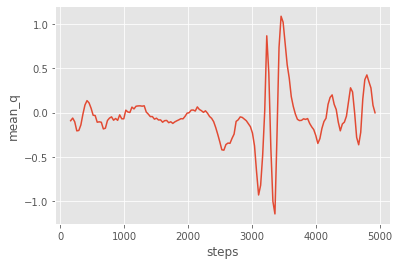

starting train 4
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 17s 17ms/step - reward: 11.3605 - cumulative_reward: -576.5529
train 4 completed. took 82.287 seconds, total_reward: -731.9999999999812 total_profit: 0.8311928967678791
min reward: -179.59999999999755, max reward: 233.4000000000014, mean_reward: -0.1479086684178584


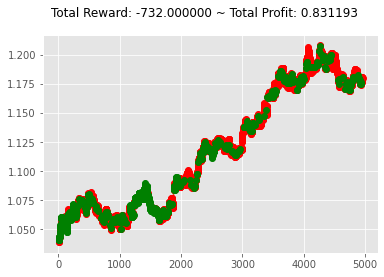

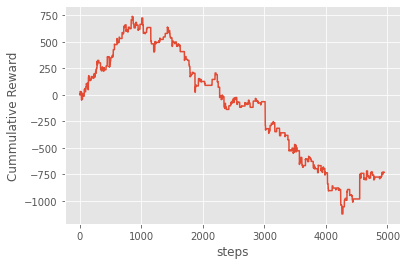

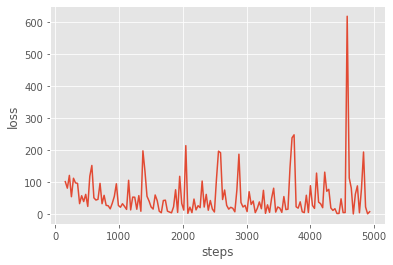

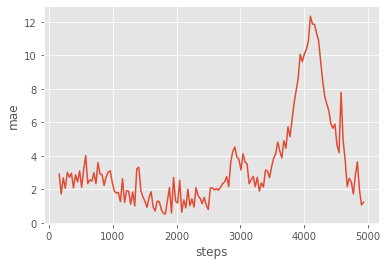

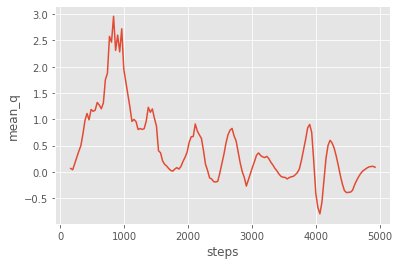

starting train 5
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 18s 18ms/step - reward: -1.0022 - cumulative_reward: -948.1907
train 5 completed. took 105.262 seconds, total_reward: -992.0000000000686 total_profit: 0.8271690052020862
min reward: -241.4000000000005, max reward: 125.2999999999993, mean_reward: -0.20044453424935715


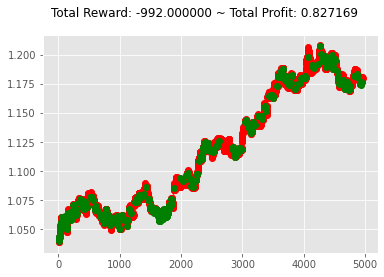

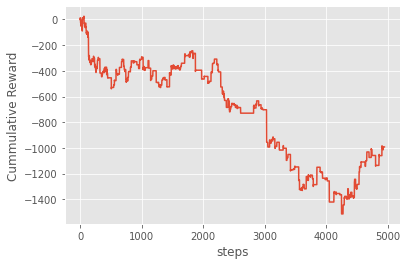

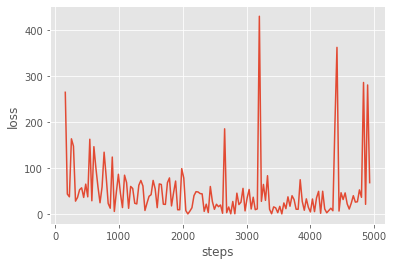

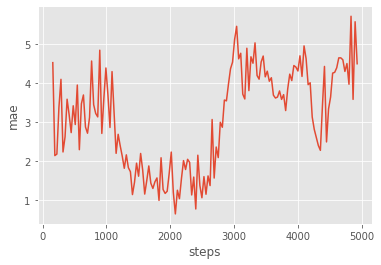

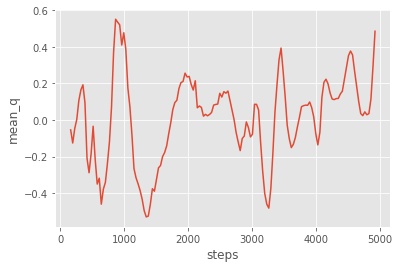

starting train 6
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 18s 19ms/step - reward: -6.1591 - cumulative_reward: -659.6019
train 6 completed. took 129.220 seconds, total_reward: -1147.2999999999633 total_profit: 0.8159198349379222
min reward: -132.6000000000005, max reward: 160.60000000000184, mean_reward: -0.2318246110325244


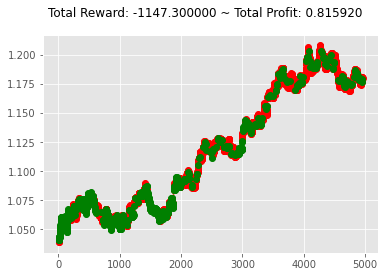

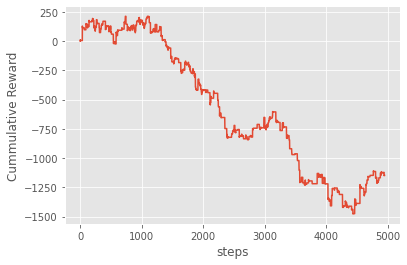

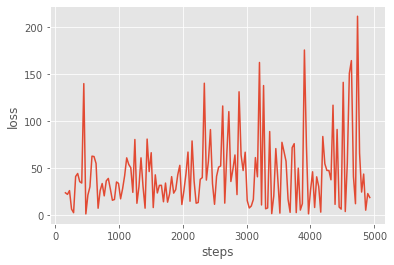

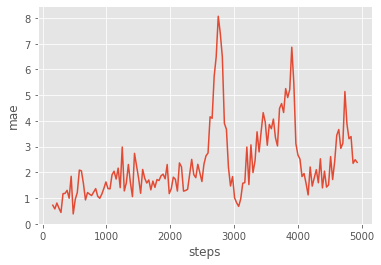

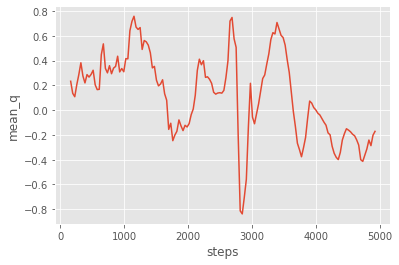

starting train 7
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 19s 19ms/step - reward: 0.0971 - cumulative_reward: -32.2071
train 7 completed. took 154.355 seconds, total_reward: 96.09999999994334 total_profit: 0.8819856928638041
min reward: -122.50000000000094, max reward: 168.70000000000164, mean_reward: 0.019418064255393684


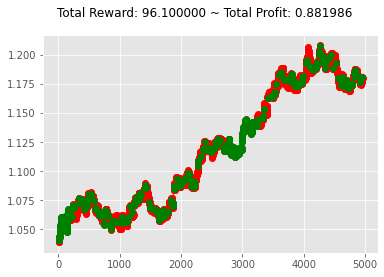

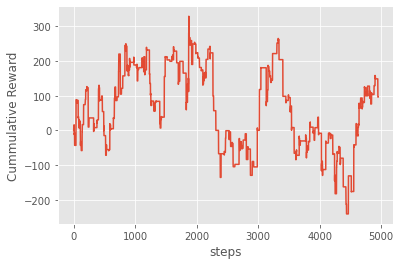

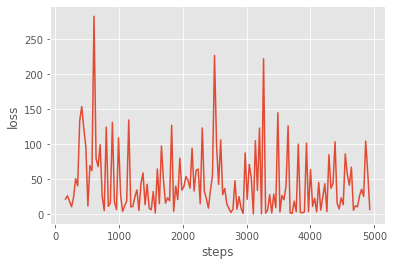

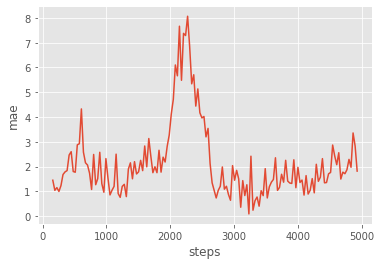

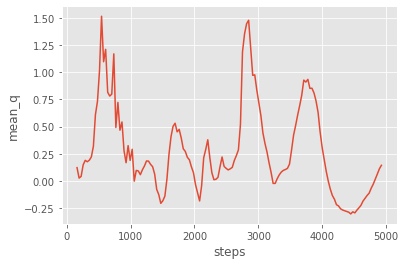

starting train 8
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 19s 20ms/step - reward: -1.2925 - cumulative_reward: -1015.1329
train 8 completed. took 179.723 seconds, total_reward: -1279.2999999999727 total_profit: 0.8341428056617994
min reward: -262.2000000000013, max reward: 120.20000000000141, mean_reward: -0.25849666599312443


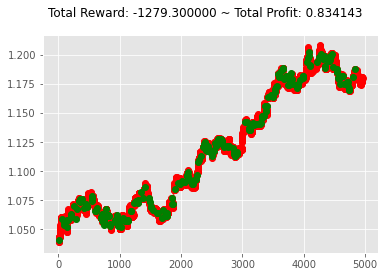

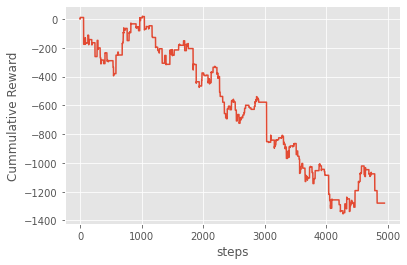

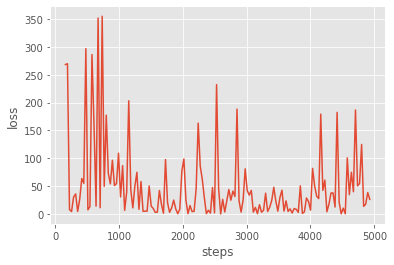

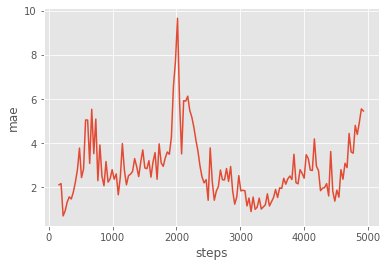

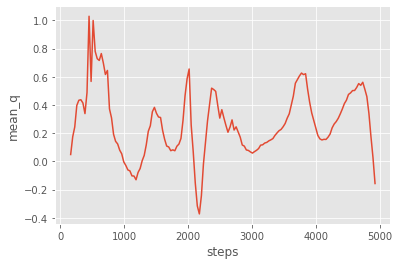

starting train 9
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 20s 20ms/step - reward: -1.2889 - cumulative_reward: -863.0166
train 9 completed. took 205.757 seconds, total_reward: -1275.799999999941 total_profit: 0.8291872740585293
min reward: -160.59999999999962, max reward: 115.7000000000008, mean_reward: -0.2577894524146173


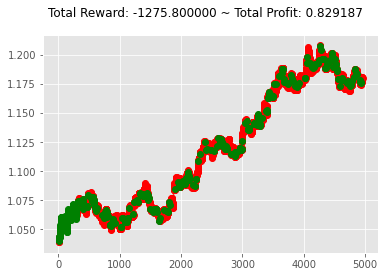

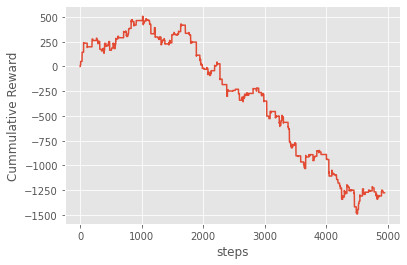

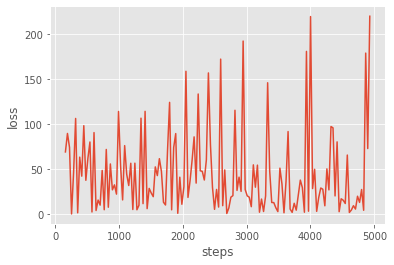

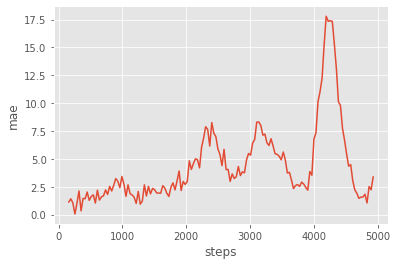

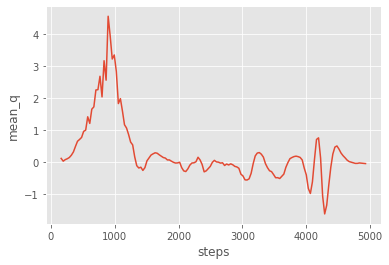

starting train 10
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 21s 21ms/step - reward: -1.9809 - cumulative_reward: -1312.2666
train 10 completed. took 232.745 seconds, total_reward: -1960.699999999916 total_profit: 0.7981790546490387
min reward: -215.40000000000114, max reward: 157.80000000000126, mean_reward: -0.3961810466760792


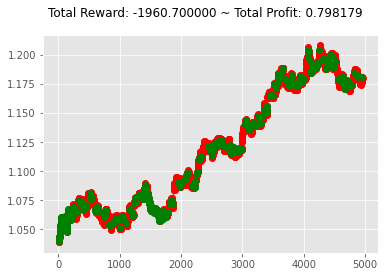

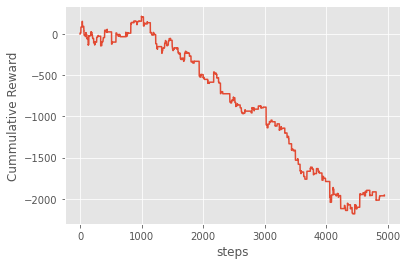

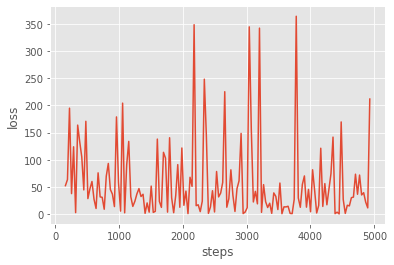

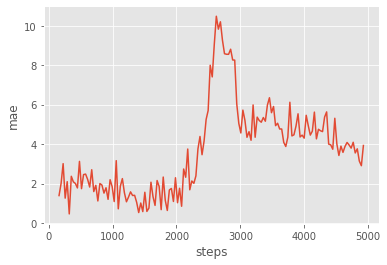

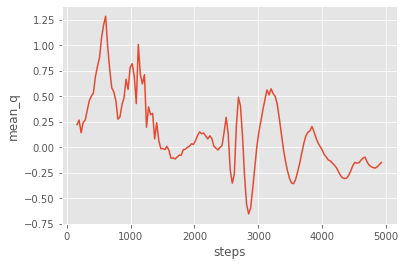

In [7]:
def agent_creator():
    #processor = EnvProcessor()
    processor = WhiteningNormalizerProcessor()
    memory = SequentialMemory(limit=1024, window_length=1)
    policy = EpsGreedyQPolicy()
    gamma = 0.6
    #policy = BoltzmannQPolicy()
    agent = DQNAgent(model=buildModel(), nb_actions=nb_actions, memory=memory, nb_steps_warmup=128, policy=policy, batch_size=64, processor=processor, 
                   gamma=gamma, target_model_update=1e-2, train_interval=32, enable_double_dqn=False)
    agent.compile(Adam(lr=0.01), metrics=['mae'])
    return agent
e = Evaluator(agent_creator, env_creator, name="dqn-gamma60")
e.train(repeat=10)

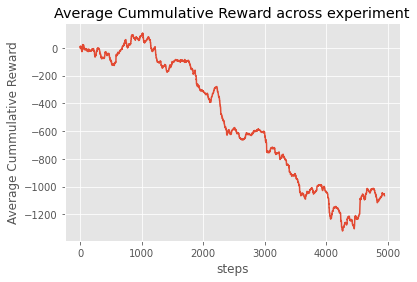

Testing for 1 episodes ...
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
183/199 [==========================>...] - ETA: 0s - reward: 0.6785 - cumulative_reward: 67.6658Episode 1: reward: 124.700, steps: 999
test completed. total_reward: 124.69999999999759 total_profit: 0.9976817128545307
min reward: -43.199999999998795, max reward: 62.40000000000245, mean_reward: 0.1248248248248224


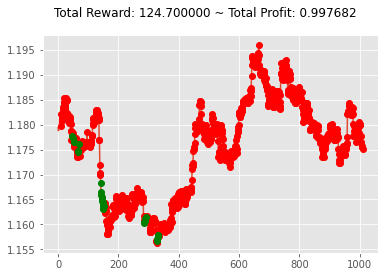

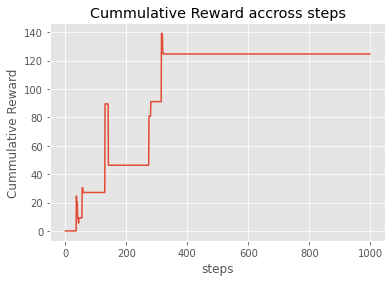

In [8]:
e.process_train_result()
e.test(gym.make('forex-v0', frame_bound=(5000, 6000), window_size=10))

starting train 1
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 22s 22ms/step - reward: 1.1947 - cumulative_reward: -545.7542
train 1 completed. took 25.640 seconds, total_reward: -599.0999999999412 total_profit: 0.8562243491960061
min reward: -108.39999999999961, max reward: 197.3999999999987, mean_reward: -0.12105475853706632


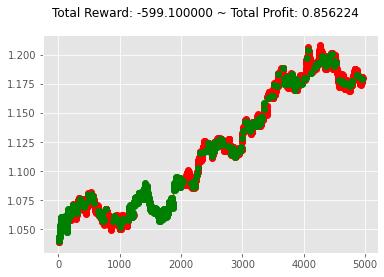

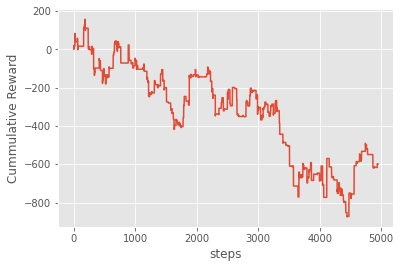

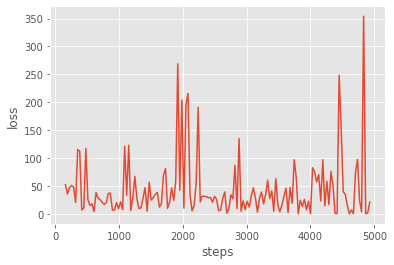

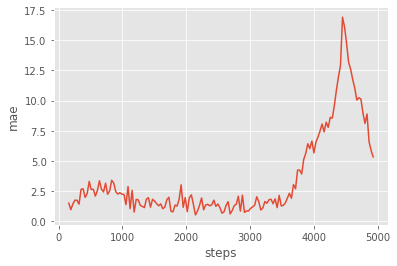

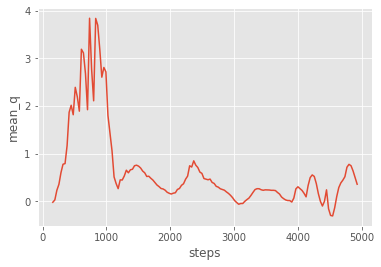

starting train 2
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 23s 23ms/step - reward: -13.7018 - cumulative_reward: 194.0559
train 2 completed. took 55.409 seconds, total_reward: 493.0999999999868 total_profit: 0.8830030976665134
min reward: -182.99999999999983, max reward: 168.20000000000056, mean_reward: 0.09963629015962554


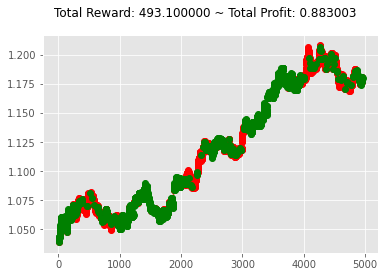

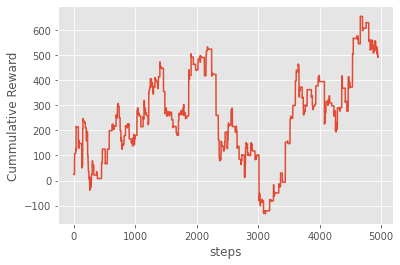

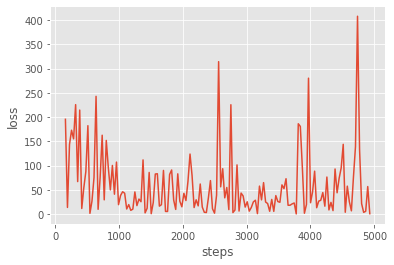

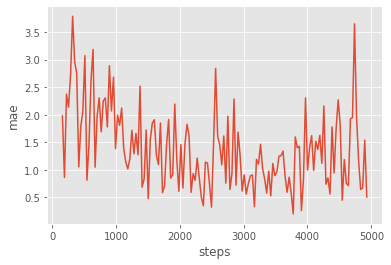

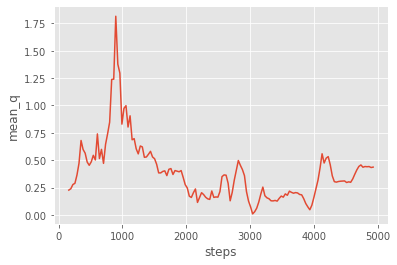

starting train 3
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 23s 23ms/step - reward: -40.4215 - cumulative_reward: -272.9823
train 3 completed. took 85.564 seconds, total_reward: -21.30000000000866 total_profit: 0.8582237942241236
min reward: -149.59999999999863, max reward: 151.90000000000038, mean_reward: -0.004303899777734625


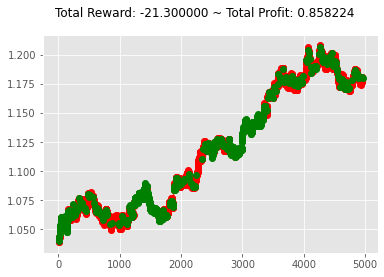

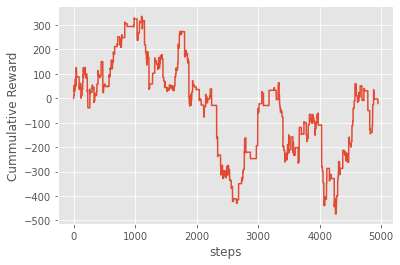

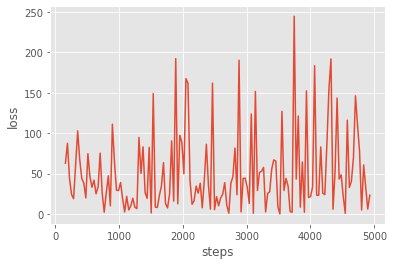

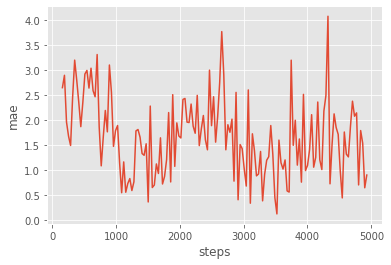

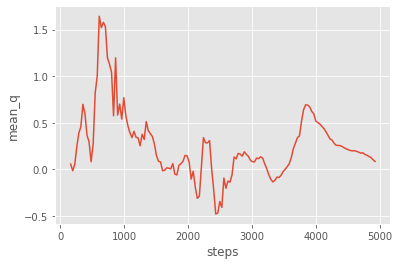

starting train 4
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 24s 24ms/step - reward: -7.0879 - cumulative_reward: -1081.0630
train 4 completed. took 116.941 seconds, total_reward: -1076.799999999971 total_profit: 0.8361432024474178
min reward: -214.09999999999928, max reward: 199.79999999999887, mean_reward: -0.21757930895129746


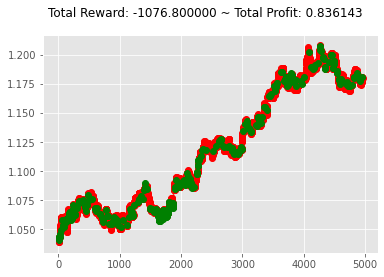

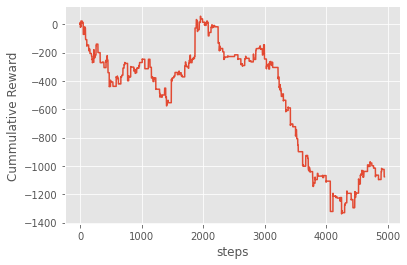

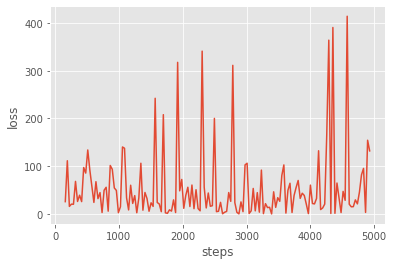

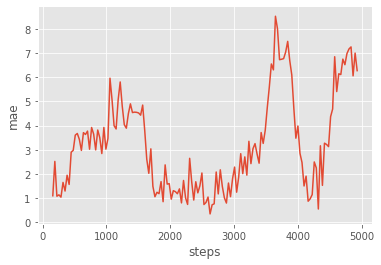

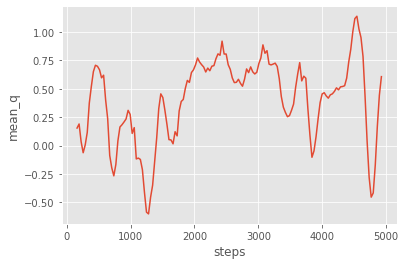

starting train 5
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 25s 25ms/step - reward: -1.1834 - cumulative_reward: -685.7623
train 5 completed. took 148.815 seconds, total_reward: -1171.2999999999952 total_profit: 0.8315064505306692
min reward: -187.6000000000011, max reward: 168.0999999999999, mean_reward: -0.2366740755708214


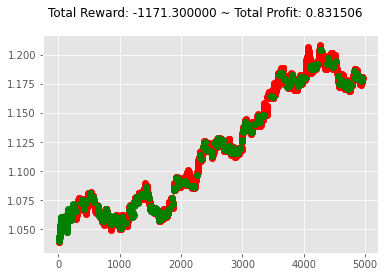

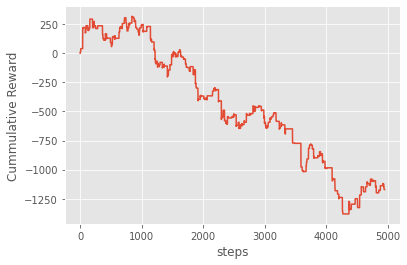

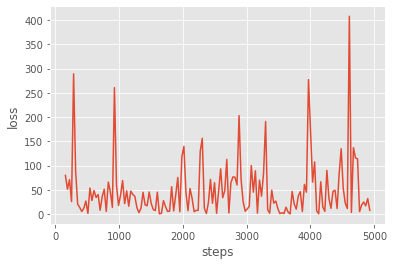

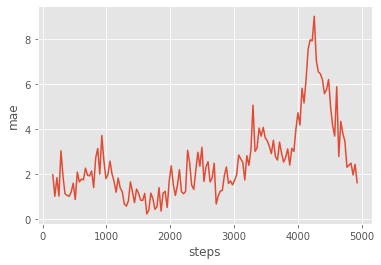

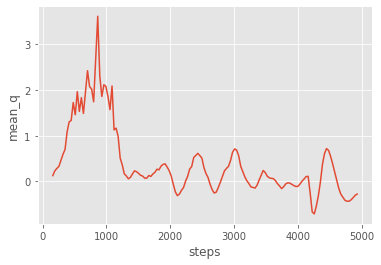

starting train 6
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 25s 25ms/step - reward: -21.4955 - cumulative_reward: 281.4831
train 6 completed. took 181.321 seconds, total_reward: 697.2999999999195 total_profit: 0.8896443711855386
min reward: -107.69999999999946, max reward: 146.10000000000235, mean_reward: 0.14089715093956748


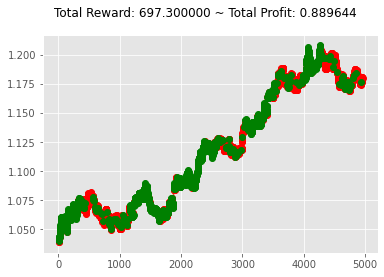

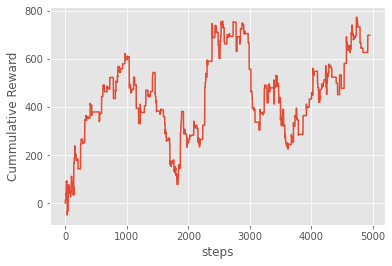

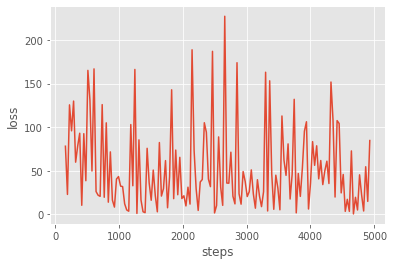

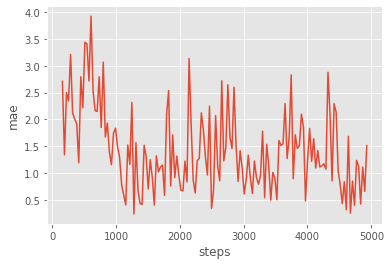

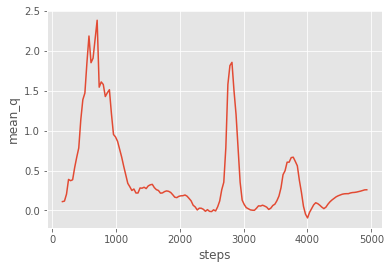

starting train 7
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 26s 26ms/step - reward: -1.3357 - cumulative_reward: -993.5903
train 7 completed. took 214.878 seconds, total_reward: -1322.0999999999788 total_profit: 0.8212810704136385
min reward: -163.69999999999996, max reward: 210.39999999999947, mean_reward: -0.26714487775307716


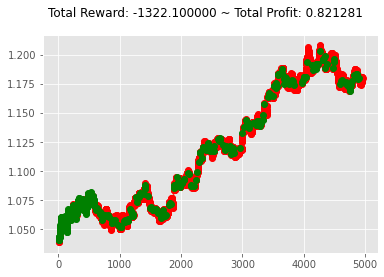

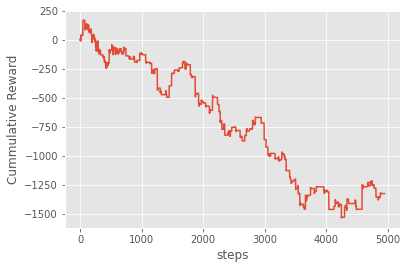

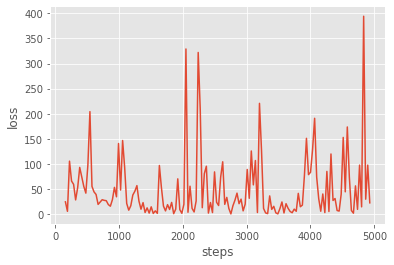

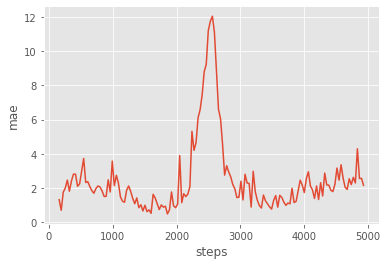

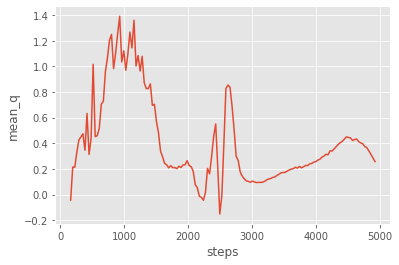

starting train 8
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 27s 27ms/step - reward: -1.1193 - cumulative_reward: -913.2437
train 8 completed. took 250.327 seconds, total_reward: -1107.8999999999971 total_profit: 0.8282227413664314
min reward: -183.80000000000064, max reward: 151.00000000000114, mean_reward: -0.22386340674883756


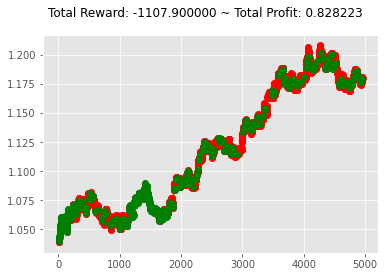

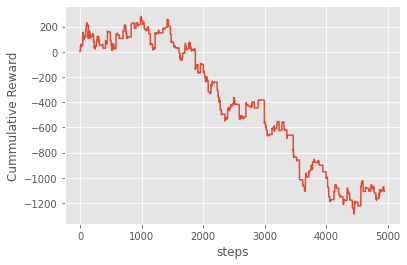

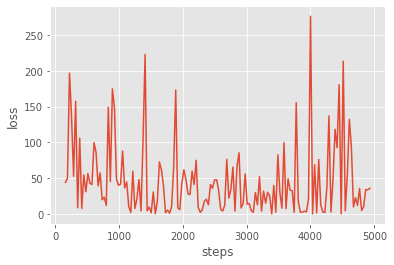

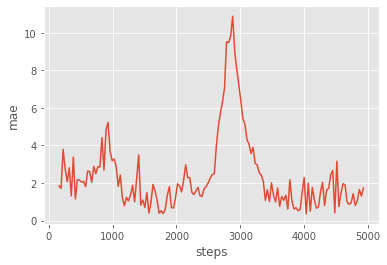

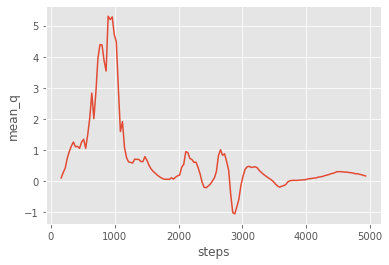

starting train 9
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 28s 28ms/step - reward: -0.9908 - cumulative_reward: -634.1852
train 9 completed. took 286.470 seconds, total_reward: -980.7000000000581 total_profit: 0.8400695704461434
min reward: -165.69999999999973, max reward: 131.49999999999994, mean_reward: -0.1981612446959099


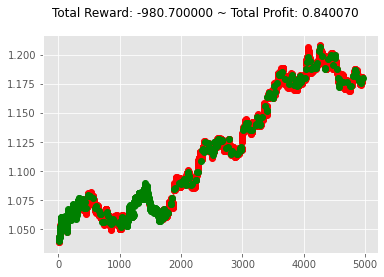

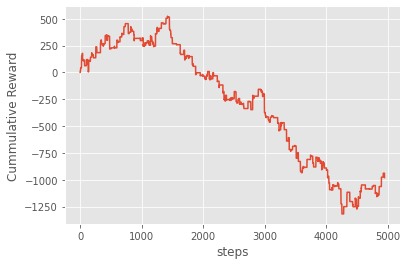

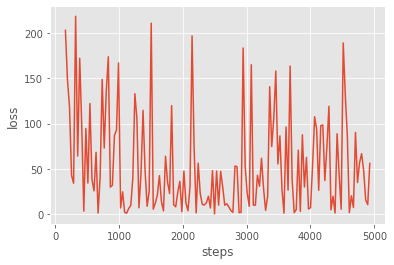

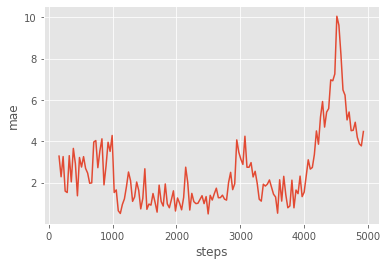

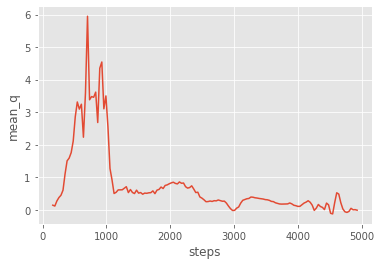

starting train 10
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 28s 28ms/step - reward: -0.6647 - cumulative_reward: -501.7827
train 10 completed. took 322.896 seconds, total_reward: -657.8999999999652 total_profit: 0.8504806100438841
min reward: -261.7000000000003, max reward: 221.30000000000206, mean_reward: -0.13293594665588304


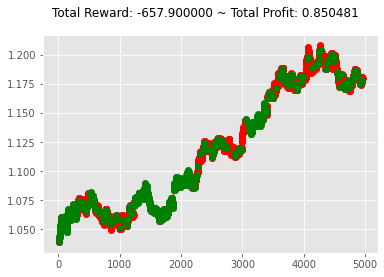

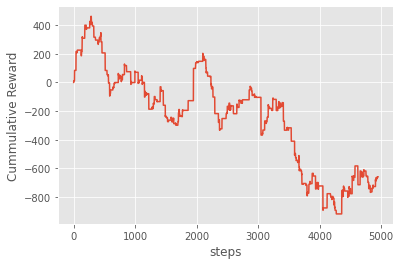

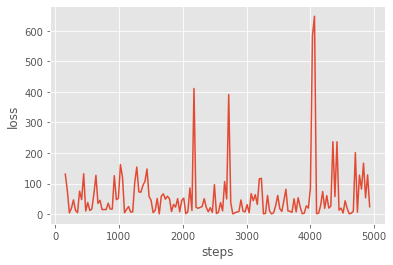

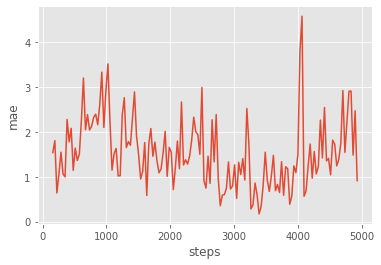

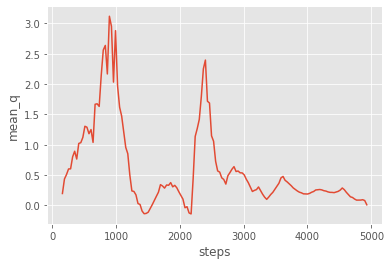

In [9]:
def agent_creator():
    #processor = EnvProcessor()
    processor = WhiteningNormalizerProcessor()
    memory = SequentialMemory(limit=1024, window_length=1)
    policy = EpsGreedyQPolicy()
    gamma = 0.8
    #policy = BoltzmannQPolicy()
    agent = DQNAgent(model=buildModel(), nb_actions=nb_actions, memory=memory, nb_steps_warmup=128, policy=policy, batch_size=64, processor=processor, 
                   gamma=gamma, target_model_update=1e-2, train_interval=32, enable_double_dqn=False)
    agent.compile(Adam(lr=0.01), metrics=['mae'])
    return agent
e = Evaluator(agent_creator, env_creator, name="dqn-gamma80")
e.train(repeat=10)

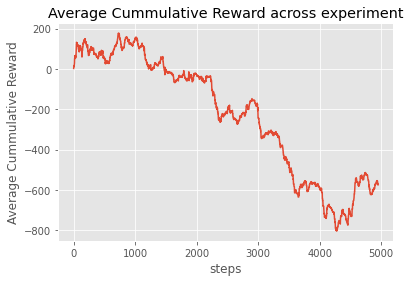

Testing for 1 episodes ...
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
190/199 [===========================>..] - ETA: 0s - reward: -0.0267 - cumulative_reward: -123.7138Episode 1: reward: -5.100, steps: 999
test completed. total_reward: -5.099999999993521 total_profit: 1.003206002019839
min reward: -154.1999999999999, max reward: 163.50000000000085, mean_reward: -0.00510510510509862


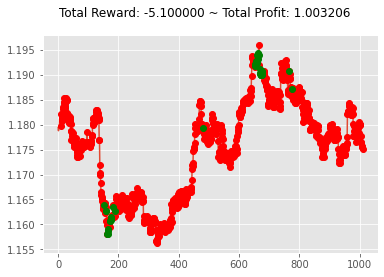

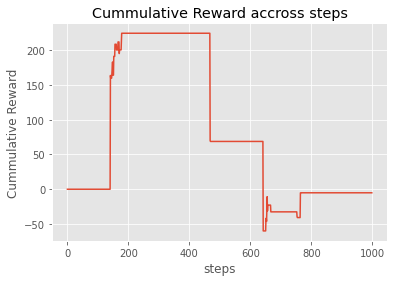

In [10]:
e.process_train_result()
e.test(gym.make('forex-v0', frame_bound=(5000, 6000), window_size=10))

starting train 1
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 29s 29ms/step - reward: -1.4748 - cumulative_reward: -1078.8615
train 1 completed. took 34.699 seconds, total_reward: -1459.7999999999754 total_profit: 0.8247695009766259
min reward: -201.2999999999998, max reward: 125.20000000000087, mean_reward: -0.2949686805415186


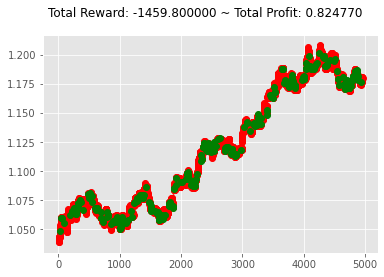

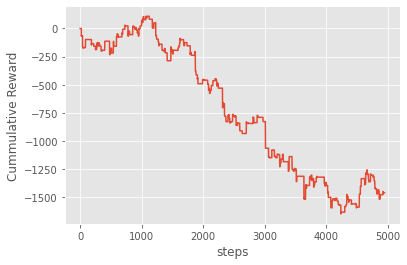

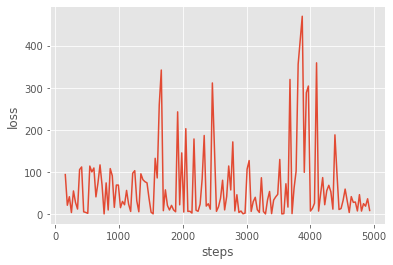

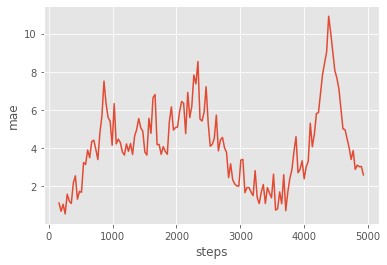

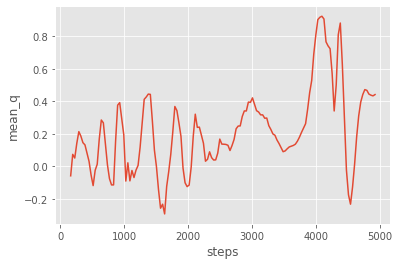

starting train 2
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 31s 31ms/step - reward: 9.7461 - cumulative_reward: -486.2214
train 2 completed. took 74.436 seconds, total_reward: -746.2000000000342 total_profit: 0.8351457033804124
min reward: -175.99999999999838, max reward: 106.19999999999851, mean_reward: -0.1507779349363577


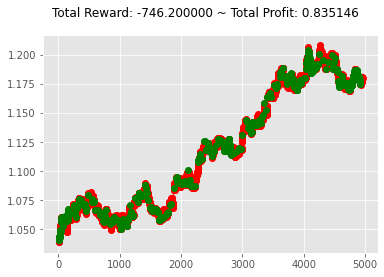

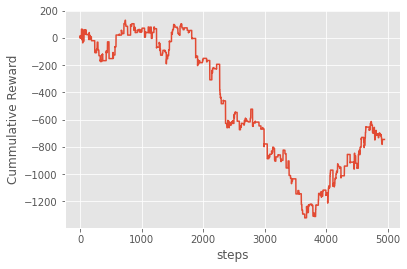

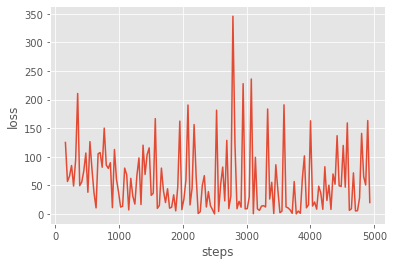

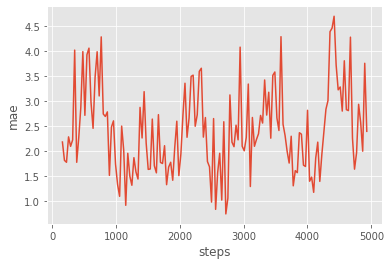

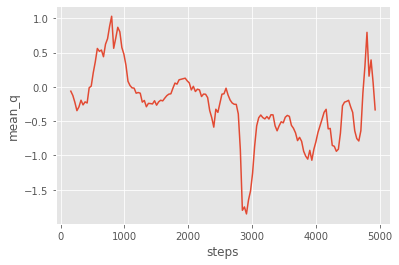

starting train 3
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 31s 31ms/step - reward: -0.7154 - cumulative_reward: -550.9767
train 3 completed. took 114.391 seconds, total_reward: -708.0999999999983 total_profit: 0.8335094230670212
min reward: -178.30000000000013, max reward: 131.6000000000006, mean_reward: -0.14307940998181418


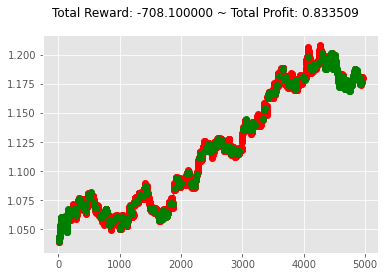

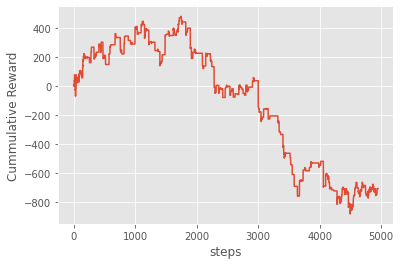

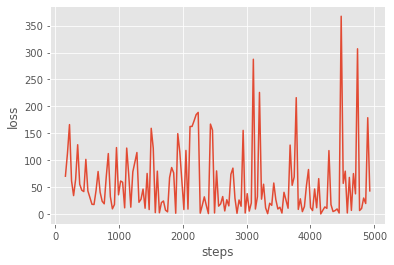

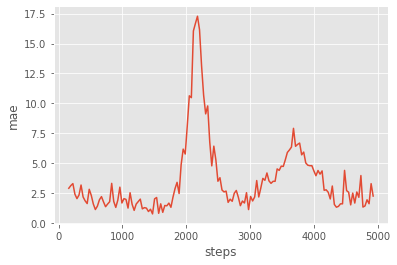

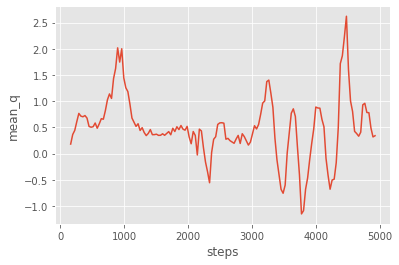

starting train 4
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 32s 32ms/step - reward: 0.4232 - cumulative_reward: -143.4005
train 4 completed. took 155.515 seconds, total_reward: 418.89999999996655 total_profit: 0.890514188897395
min reward: -191.5, max reward: 147.9000000000008, mean_reward: 0.08464336229540646


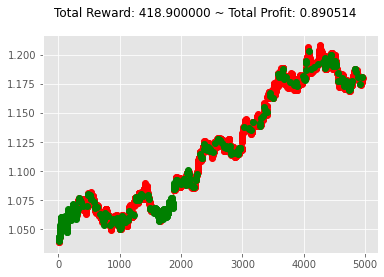

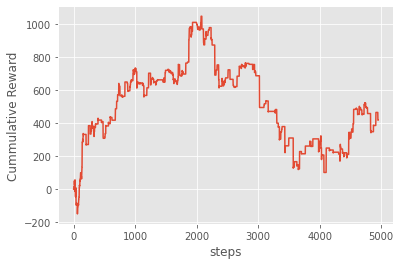

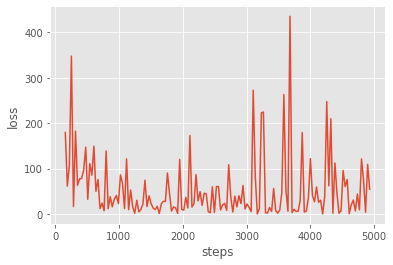

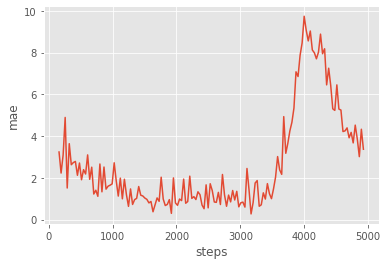

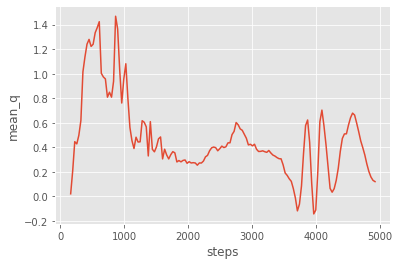

starting train 5
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 33s 34ms/step - reward: -0.1200 - cumulative_reward: -248.4047
train 5 completed. took 199.269 seconds, total_reward: -118.79999999997071 total_profit: 0.877222648045128
min reward: -163.60000000000153, max reward: 168.70000000000164, mean_reward: -0.024004849464532373


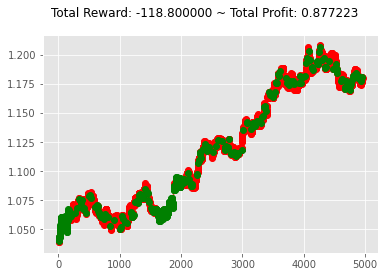

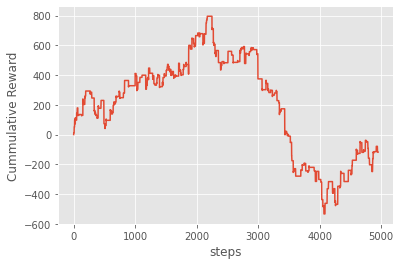

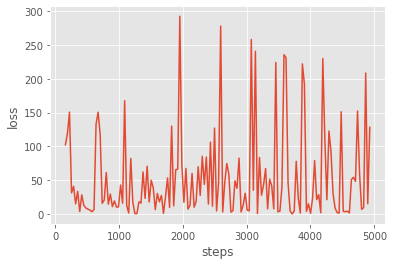

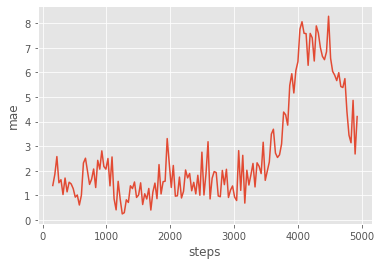

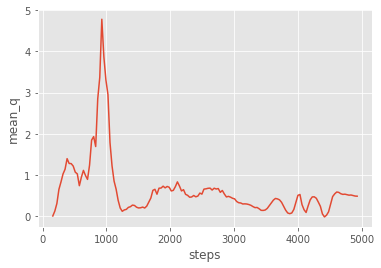

starting train 6
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 34s 34ms/step - reward: 11.0565 - cumulative_reward: -704.6246
train 6 completed. took 242.673 seconds, total_reward: -1032.9000000000783 total_profit: 0.8294797706931923
min reward: -177.70000000000064, max reward: 139.90000000000168, mean_reward: -0.20870883006669597


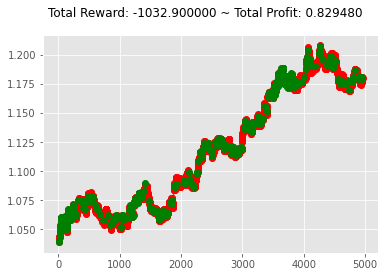

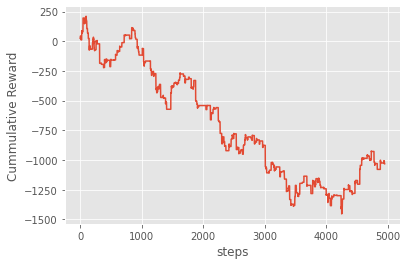

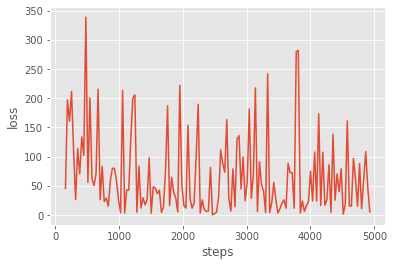

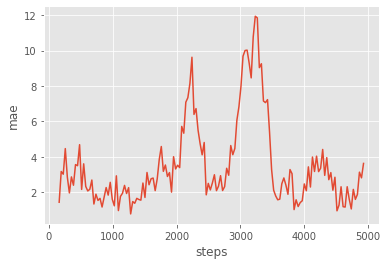

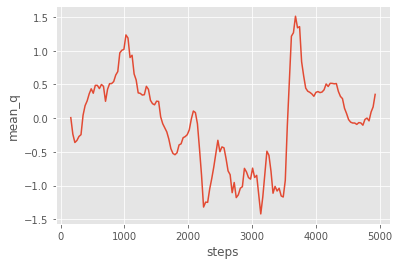

starting train 7
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 34s 35ms/step - reward: -1.1860 - cumulative_reward: -796.2455
train 7 completed. took 286.854 seconds, total_reward: -1173.9000000000635 total_profit: 0.8095282214003359
min reward: -166.3999999999999, max reward: 164.4000000000001, mean_reward: -0.23719943422915005


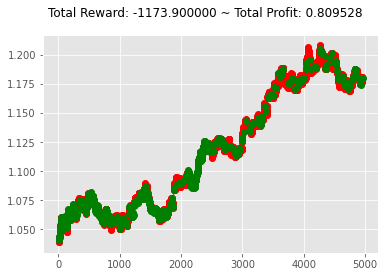

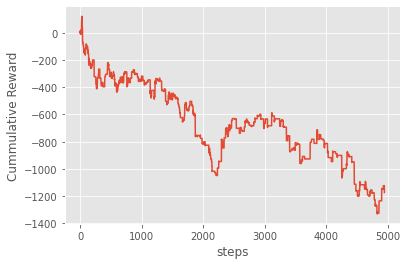

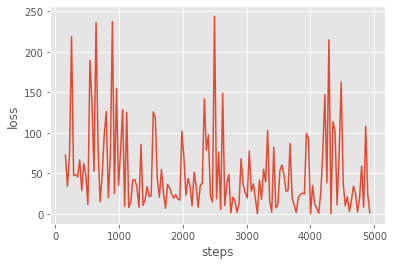

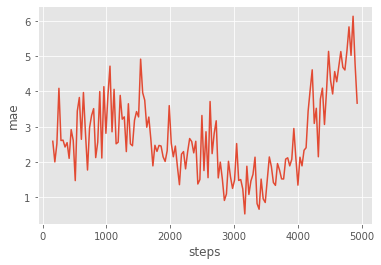

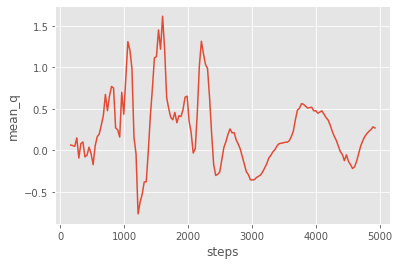

starting train 8
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 35s 35ms/step - reward: 11.4642 - cumulative_reward: -622.6991
train 8 completed. took 331.851 seconds, total_reward: -629.2999999999712 total_profit: 0.8572981688934236
min reward: -173.30000000000067, max reward: 168.70000000000164, mean_reward: -0.12715700141442132


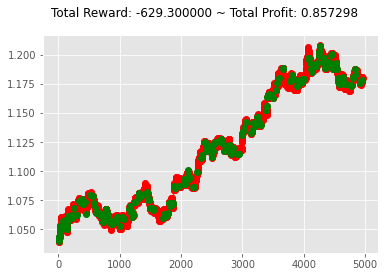

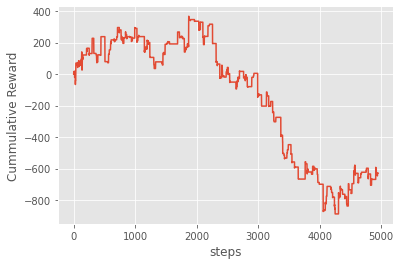

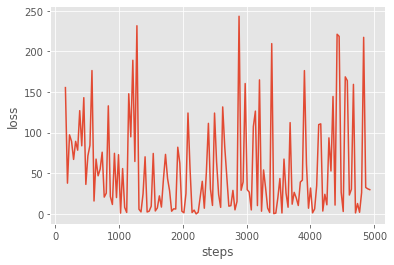

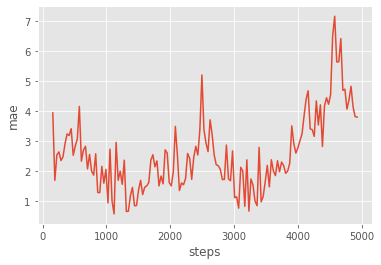

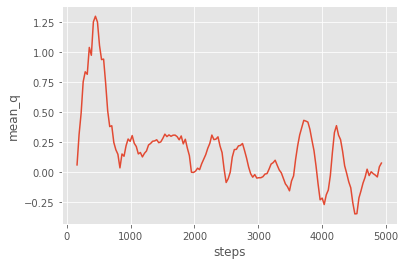

starting train 9
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 36s 36ms/step - reward: -0.2263 - cumulative_reward: -354.9704
train 9 completed. took 377.884 seconds, total_reward: -224.0000000000157 total_profit: 0.8727134095519695
min reward: -168.70000000000164, max reward: 132.6000000000005, mean_reward: -0.045261669024048434


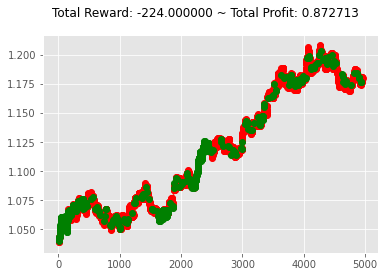

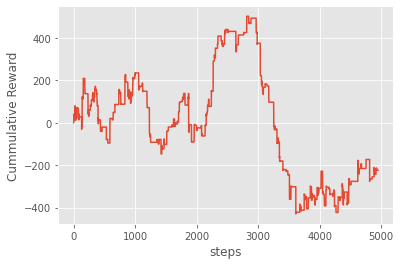

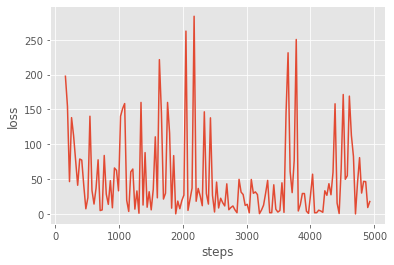

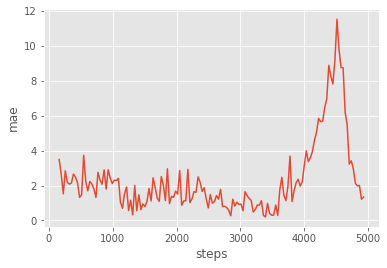

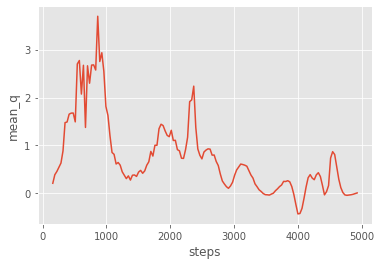

starting train 10
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 37s 37ms/step - reward: 0.2354 - cumulative_reward: -18.1540
train 10 completed. took 424.919 seconds, total_reward: 232.99999999997686 total_profit: 0.8891396546651563
min reward: -152.3999999999992, max reward: 210.70000000000144, mean_reward: 0.04708021822589955


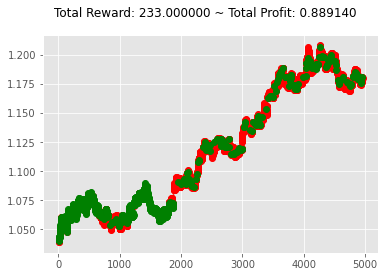

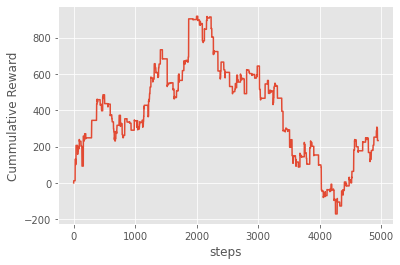

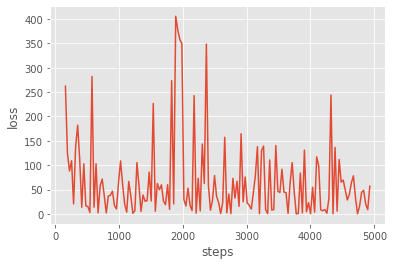

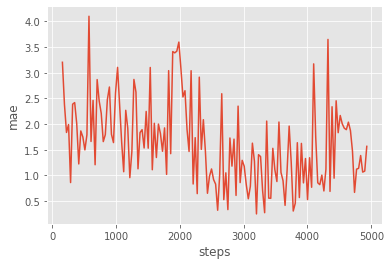

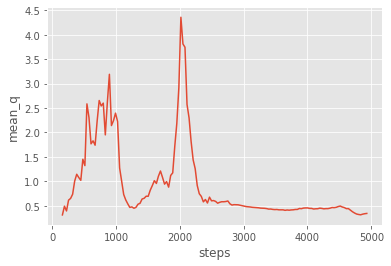

In [11]:
def agent_creator():
    #processor = EnvProcessor()
    processor = WhiteningNormalizerProcessor()
    memory = SequentialMemory(limit=1024, window_length=1)
    policy = EpsGreedyQPolicy()
    gamma = 0.95
    #policy = BoltzmannQPolicy()
    agent = DQNAgent(model=buildModel(), nb_actions=nb_actions, memory=memory, nb_steps_warmup=128, policy=policy, batch_size=64, processor=processor, 
                   gamma=gamma, target_model_update=1e-2, train_interval=32, enable_double_dqn=False)
    agent.compile(Adam(lr=0.01), metrics=['mae'])
    return agent
e = Evaluator(agent_creator, env_creator, name="dqn-gamma95")
e.train(repeat=10)

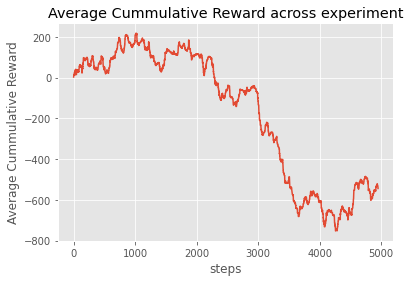

Testing for 1 episodes ...
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
179/199 [=========================>....] - ETA: 0s - reward: 0.4338 - cumulative_reward: 22.3476Episode 1: reward: 78.000, steps: 999
test completed. total_reward: 78.00000000000252 total_profit: 1.0003944389296555
min reward: -40.70000000000018, max reward: 103.10000000000042, mean_reward: 0.07807807807808059


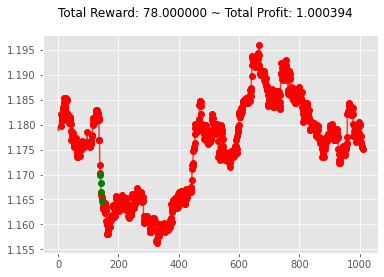

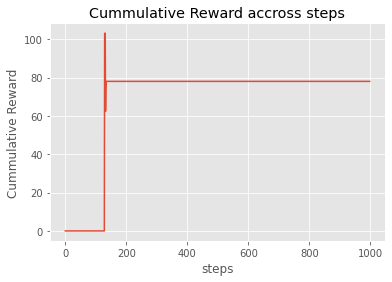

In [12]:
e.process_train_result()
e.test(gym.make('forex-v0', frame_bound=(5000, 6000), window_size=10))

starting train 1
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 38s 39ms/step - reward: -0.7436 - cumulative_reward: -494.3609
train 1 completed. took 45.374 seconds, total_reward: -735.9999999999967 total_profit: 0.8431538381502153
min reward: -192.9000000000003, max reward: 149.100000000002, mean_reward: -0.14871691250757663


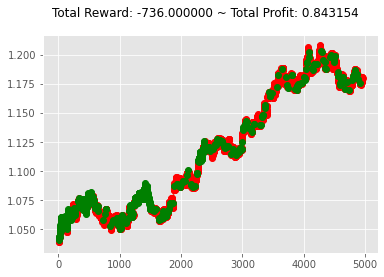

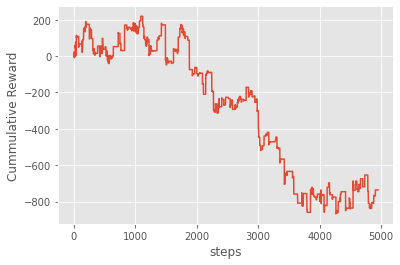

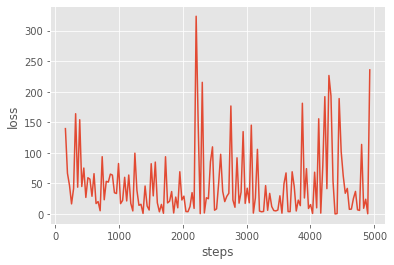

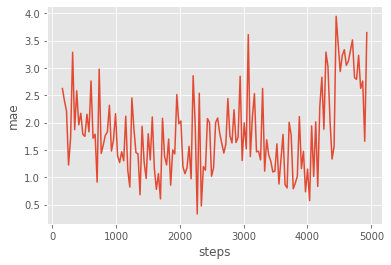

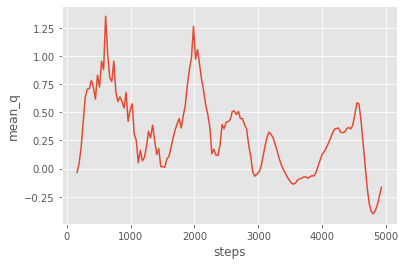

starting train 2
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 39s 39ms/step - reward: -3.5195 - cumulative_reward: -502.2787
train 2 completed. took 95.010 seconds, total_reward: -712.2000000000812 total_profit: 0.8466787975343868
min reward: -225.9000000000011, max reward: 146.29999999999922, mean_reward: -0.1439078601737889


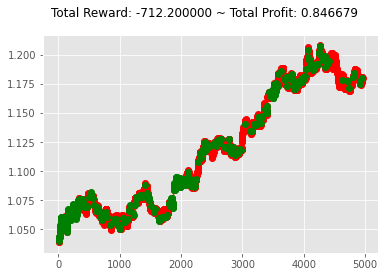

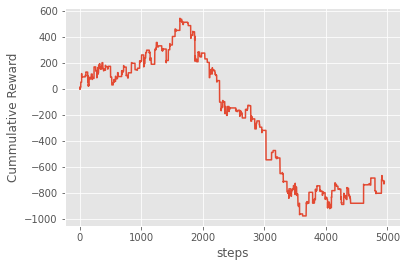

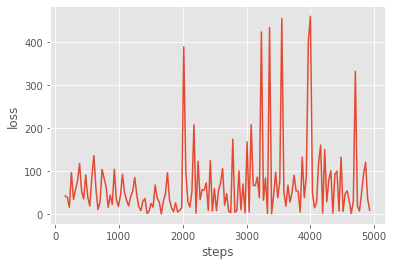

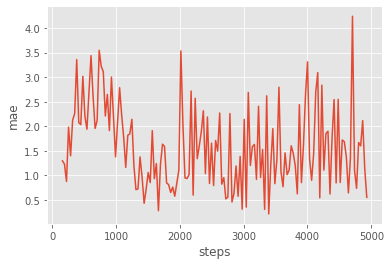

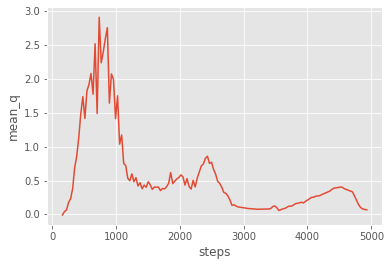

starting train 3
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 40s 40ms/step - reward: 11.9285 - cumulative_reward: -134.7945
train 3 completed. took 146.873 seconds, total_reward: -169.80000000001584 total_profit: 0.8638142548542624
min reward: -137.40000000000086, max reward: 121.0, mean_reward: -0.03430996160840894


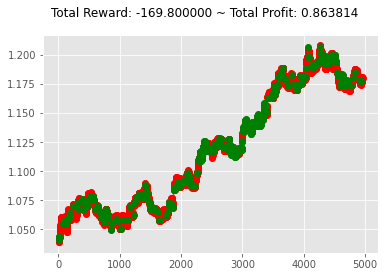

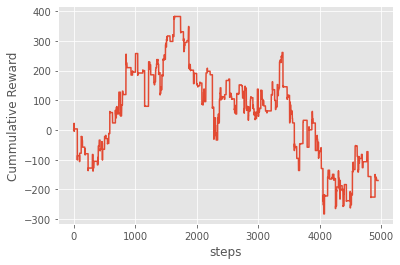

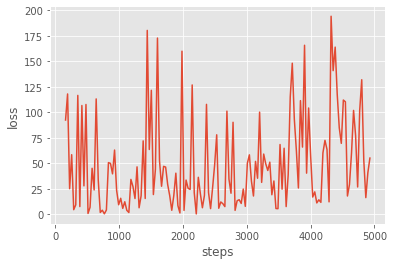

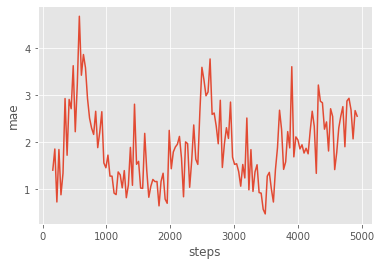

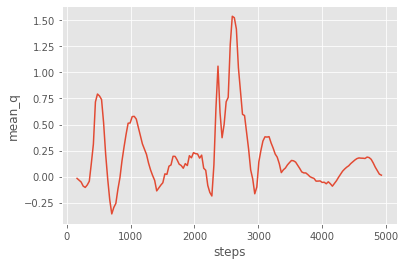

starting train 4
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 41s 41ms/step - reward: -0.9328 - cumulative_reward: -789.7935
train 4 completed. took 198.953 seconds, total_reward: -923.2999999999645 total_profit: 0.8376945980645374
min reward: -198.2000000000017, max reward: 125.20000000000087, mean_reward: -0.1865629420084794


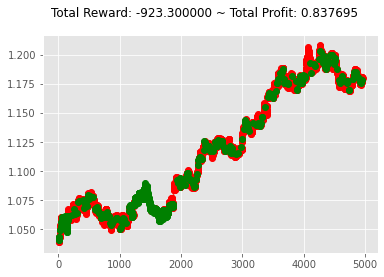

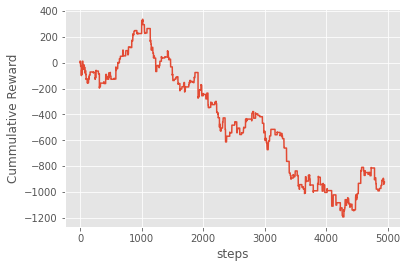

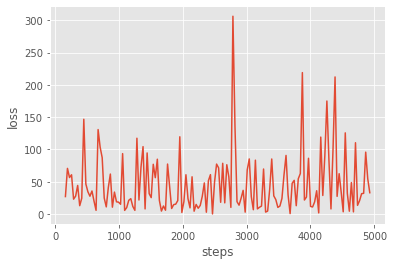

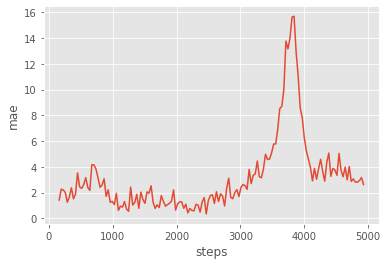

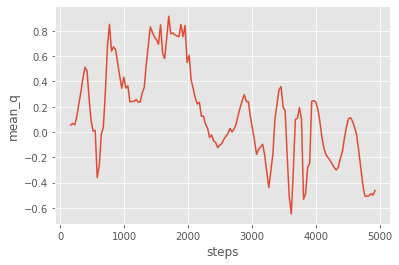

starting train 5
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 41s 42ms/step - reward: 10.3229 - cumulative_reward: -286.2132
train 5 completed. took 252.014 seconds, total_reward: -175.30000000006703 total_profit: 0.8647697765659351
min reward: -204.49999999999858, max reward: 124.99999999999956, mean_reward: -0.03542129723177754


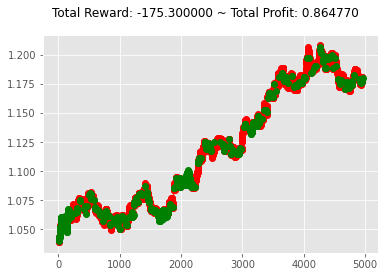

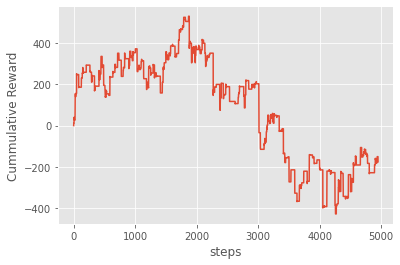

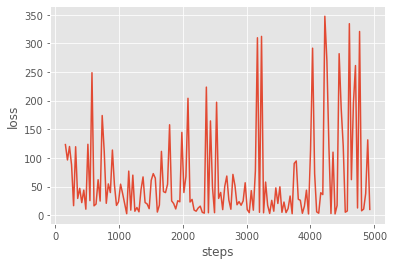

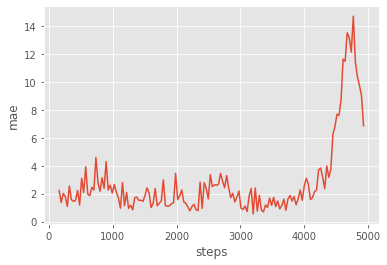

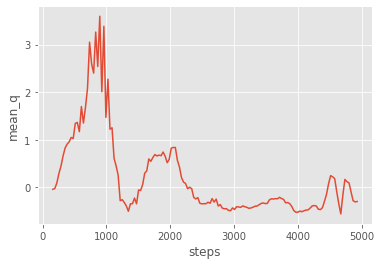

starting train 6
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 42s 43ms/step - reward: 11.4518 - cumulative_reward: -416.3854
train 6 completed. took 306.082 seconds, total_reward: -641.600000000012 total_profit: 0.83869107754092
min reward: -155.49999999999952, max reward: 129.89999999999836, mean_reward: -0.1296423519903035


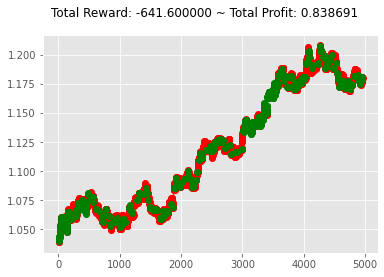

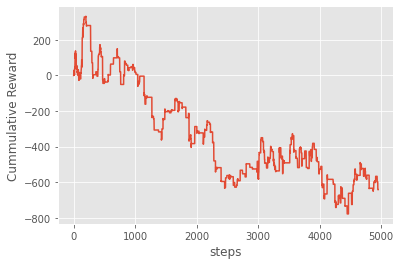

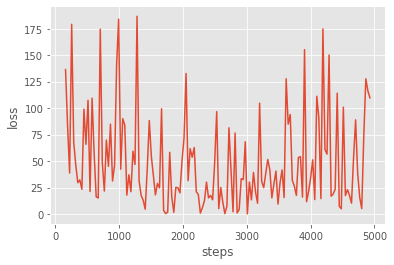

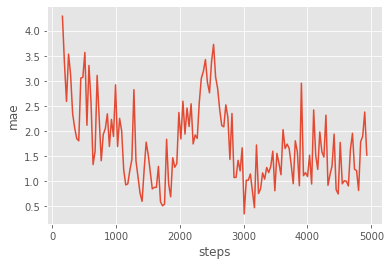

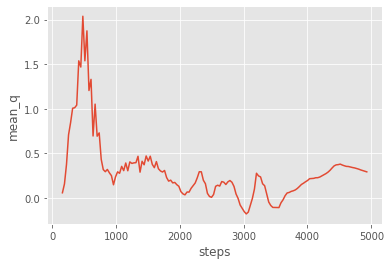

starting train 7
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 43s 43ms/step - reward: -0.4271 - cumulative_reward: -559.1908
train 7 completed. took 361.084 seconds, total_reward: -422.70000000001096 total_profit: 0.864174612345223
min reward: -177.00000000000048, max reward: 158.50000000000142, mean_reward: -0.08541119418064477


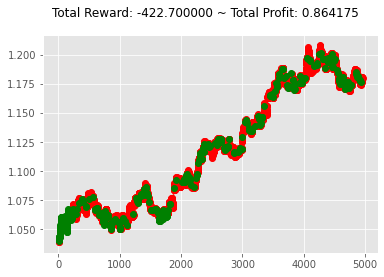

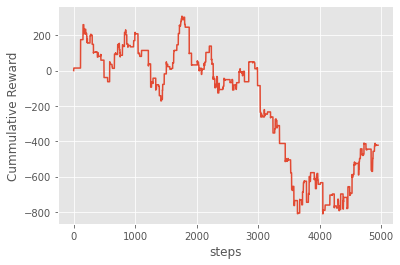

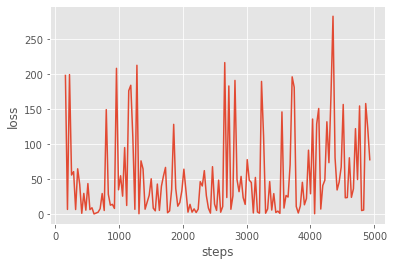

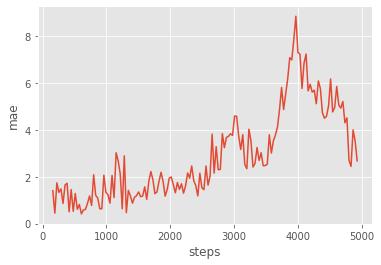

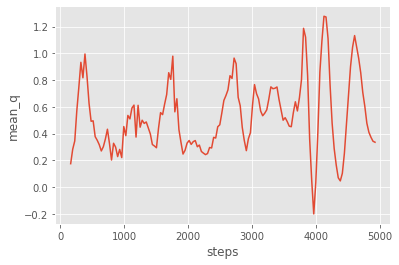

starting train 8
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 43s 44ms/step - reward: -6.2539 - cumulative_reward: -254.4866
train 8 completed. took 417.025 seconds, total_reward: 243.59999999997058 total_profit: 0.8638433594163856
min reward: -145.39999999999998, max reward: 151.70000000000127, mean_reward: 0.049222065063643274


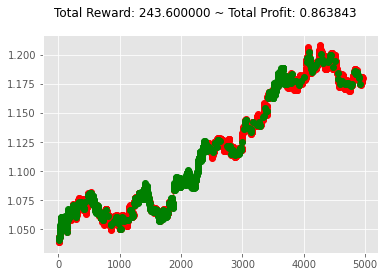

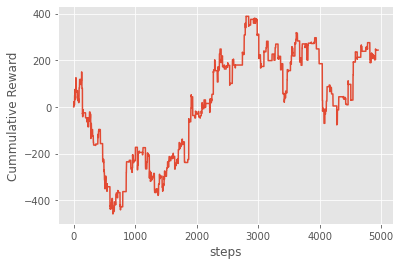

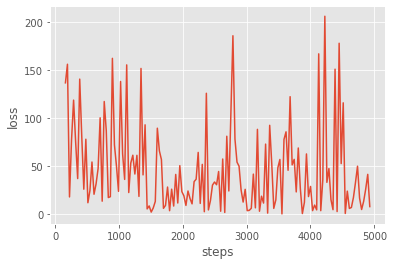

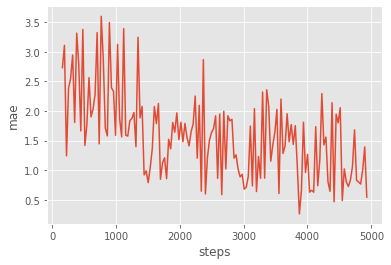

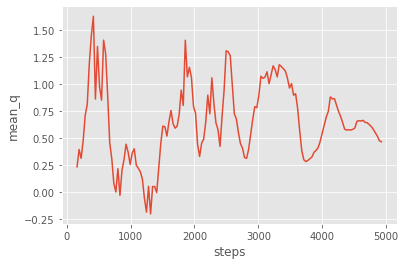

starting train 9
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 51s 51ms/step - reward: -1.0435 - cumulative_reward: -716.8253
train 9 completed. took 476.928 seconds, total_reward: -1032.8999999999369 total_profit: 0.8369766215638456
min reward: -167.0000000000016, max reward: 211.10000000000184, mean_reward: -0.20870883006666738


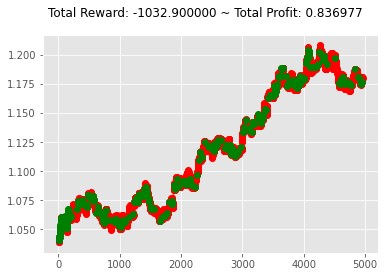

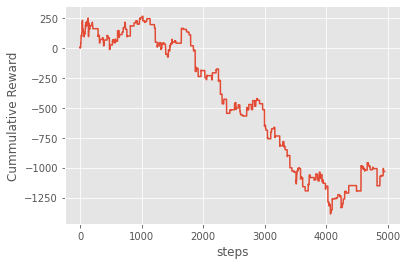

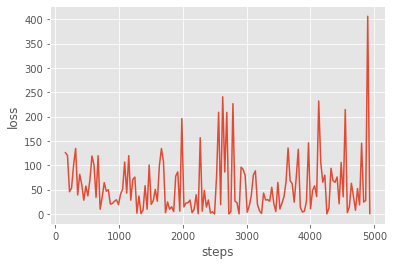

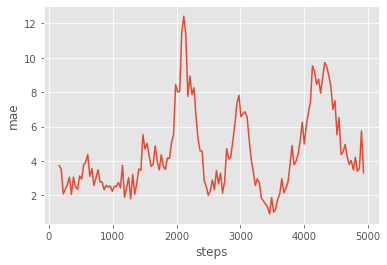

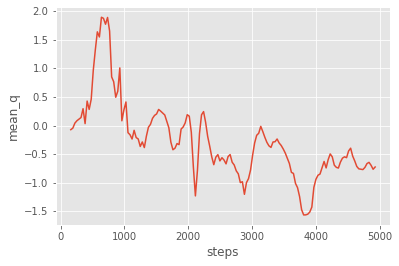

starting train 10
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 46s 46ms/step - reward: -0.5650 - cumulative_reward: -367.9504
train 10 completed. took 535.491 seconds, total_reward: -559.1999999999865 total_profit: 0.8586728099573686
min reward: -148.59999999999874, max reward: 117.70000000000059, mean_reward: -0.11299252374216741


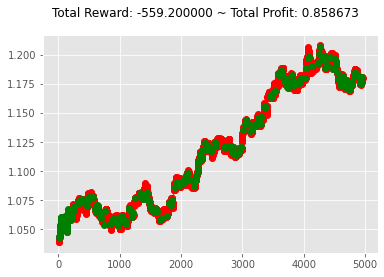

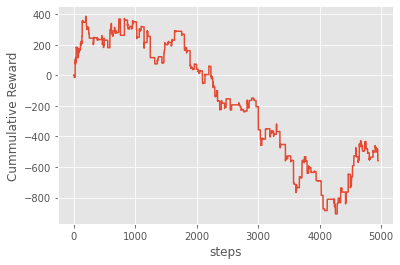

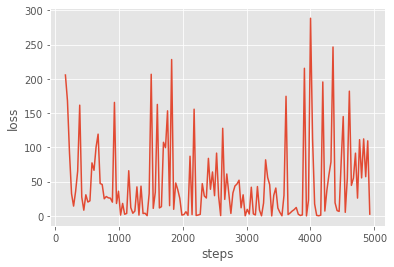

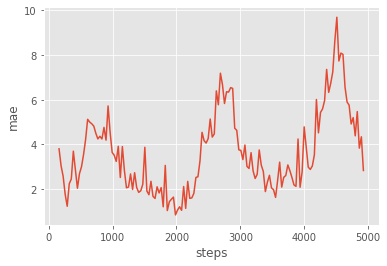

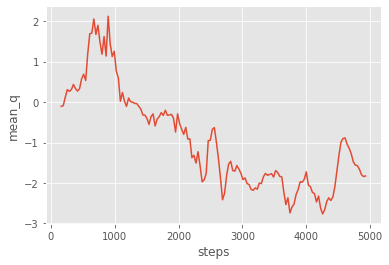

In [13]:
def agent_creator():
    #processor = EnvProcessor()
    processor = WhiteningNormalizerProcessor()
    memory = SequentialMemory(limit=1024, window_length=1)
    policy = EpsGreedyQPolicy()
    gamma = 1
    #policy = BoltzmannQPolicy()
    agent = DQNAgent(model=buildModel(), nb_actions=nb_actions, memory=memory, nb_steps_warmup=128, policy=policy, batch_size=64, processor=processor, 
                   gamma=gamma, target_model_update=1e-2, train_interval=32, enable_double_dqn=False)
    agent.compile(Adam(lr=0.01), metrics=['mae'])
    return agent
e = Evaluator(agent_creator, env_creator, name="dqn-gamma100")
e.train(repeat=10)

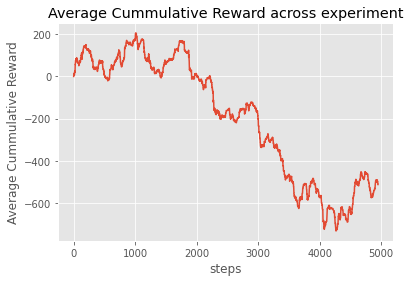

Testing for 1 episodes ...
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
193/199 [============================>.] - ETA: 0s - reward: 0.7683 - cumulative_reward: 30.5645Episode 1: reward: 148.900, steps: 999
test completed. total_reward: 148.89999999999847 total_profit: 1.0069613692549202
min reward: -20.900000000001473, max reward: 103.4999999999986, mean_reward: 0.1490490490490475


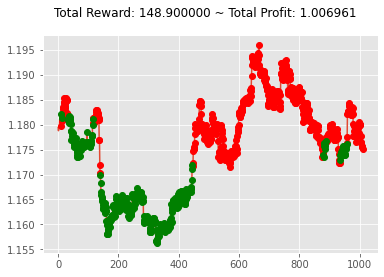

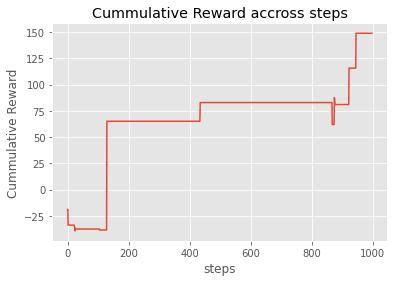

In [14]:
e.process_train_result()
e.test(gym.make('forex-v0', frame_bound=(5000, 6000), window_size=10))

info: {'total_reward': -1072.6000000000504, 'total_profit': 0.6457741929731675, 'position': 1}


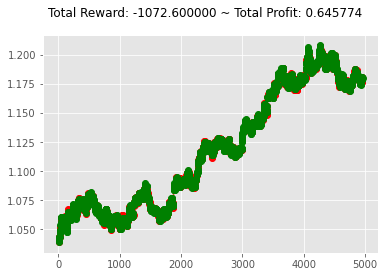

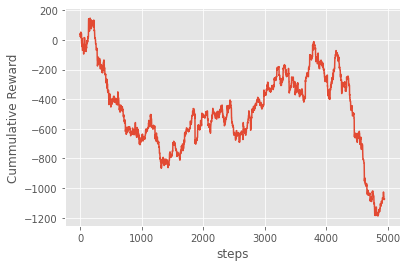

In [15]:
#base line random policy

data = []
env = env_creator()

observation = env.reset()
t = 0
while True:
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    data.append([t, reward, env._total_reward])
    t+=1
    # env.render()
    if done:
        print("info:", info)
        break
data = np.array(data)
plt.cla()
env.render_all()
plt.show()
plt.close()
plt.plot(data[:, [0]], data[:, [2]])
plt.xlabel('steps')
plt.ylabel('Cummulative Reward')
plt.show()